In [24]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [25]:
dengue = pd.read_csv('datasets/dengue.csv')

In [26]:
dengue.head()

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1


In [27]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


<h1> DENGUE CASES TREND FROM 2016 - 2020 </h1>

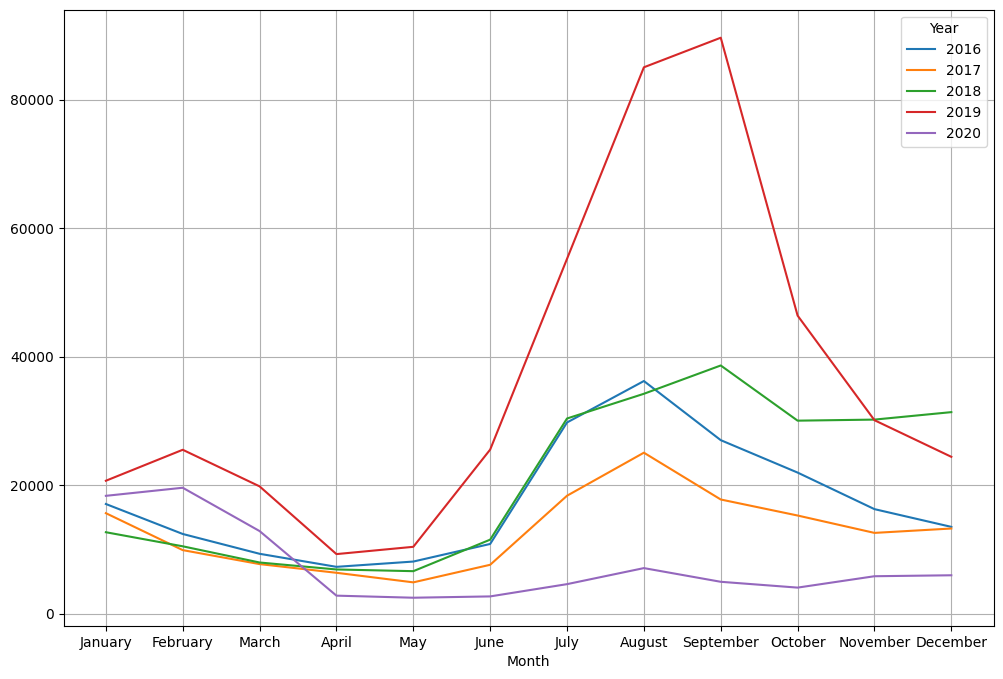

In [28]:

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

monthly_cases = dengue.groupby([dengue.Month, dengue.Year])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='line')
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.xticks(range(0,12), month_order)
plt.show()


<h3> Insight </h3>
<p>In 2016, the Dengvaxia vaccine was introduced as part of the country's dengue prevention efforts.5
Unfortunately, nearly two years after the campaign started, Sanofi, the vaccine developer, announced that Dengvaxia might cause ‘more severe disease’ in those who have not had previous dengue infection. By this time, over 800,000 children had been indiscriminately inoculated, and public outrage ensued, with lawsuits filed against Sanofi and various government officials due to claims of children's deaths from the vaccine and government corruption. The resulting mistrust against the public health sector plunged immunization rates, precipitating a measles outbreak in 2019. </p>

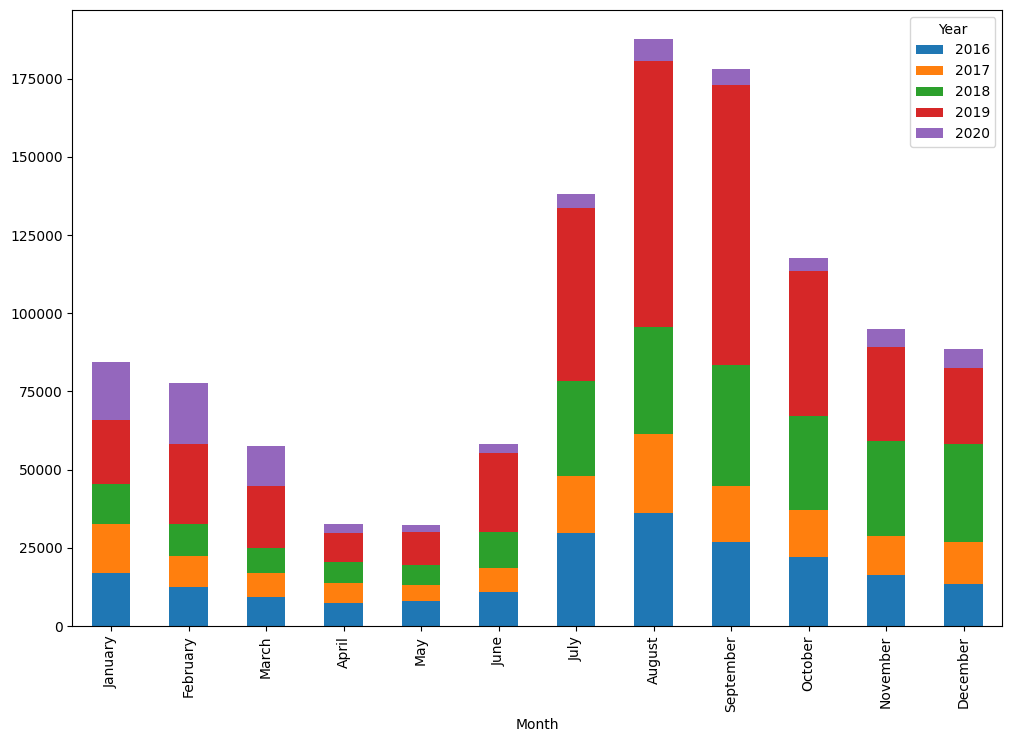

In [29]:
monthly_cases.unstack().plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(12,8)
plt.show()

<h1> ANALYSIS OF DENGUE CASES PER REGION </h1>

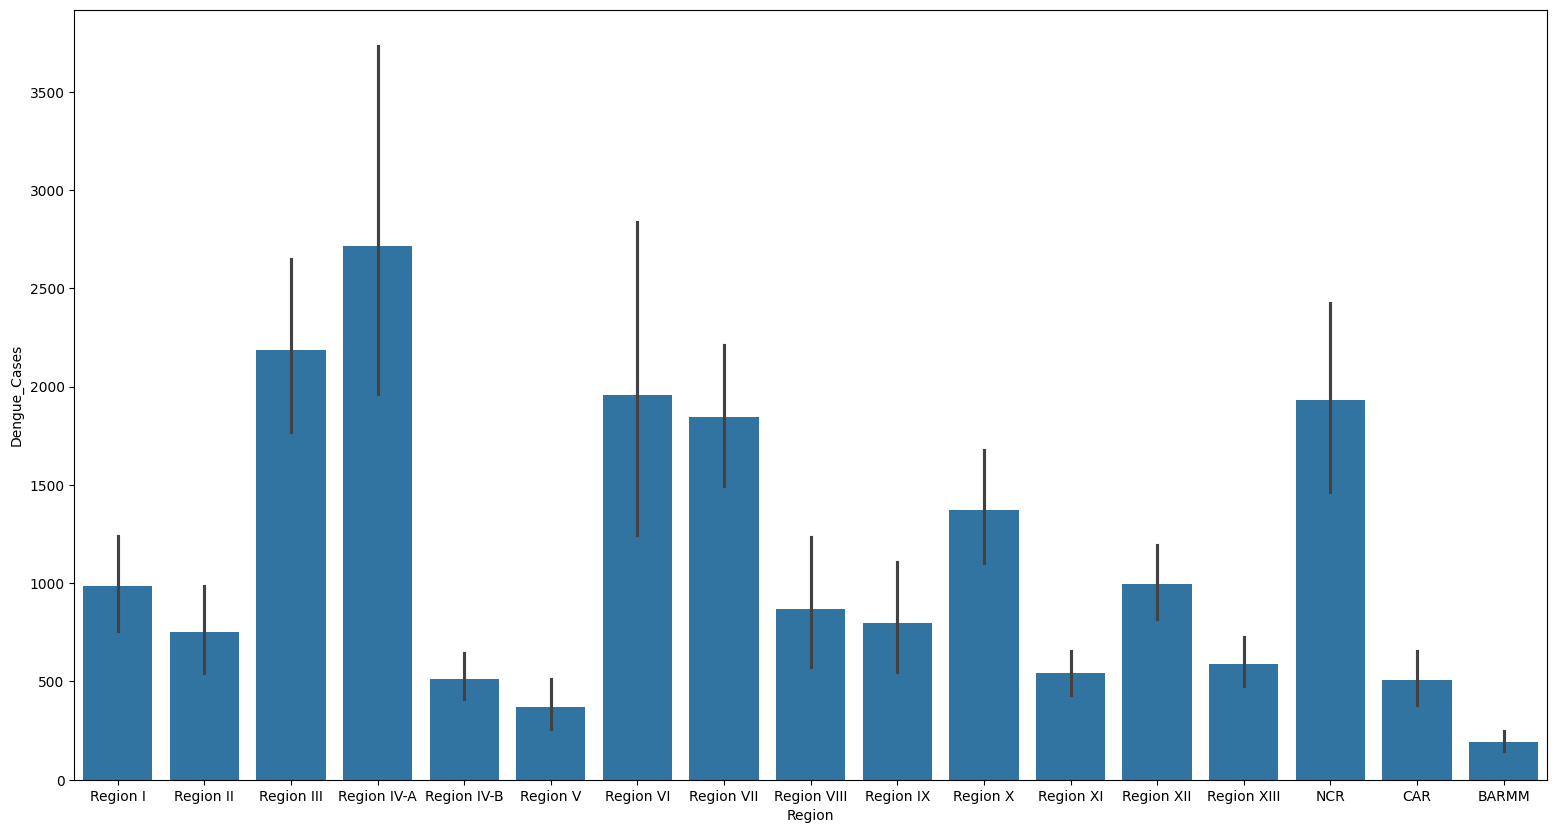

In [30]:
visual1 = sns.barplot(data=dengue, x='Region', y="Dengue_Cases")
plt.gcf().set_size_inches(19,10)
plt.show()

<h2> Insight </h2>
<p> The highest case was the most densely populated regions in the country specially the NCR, REGION III, and REGION IVA - CALABARZON region </p>

<h1> Mortality Rate per each Region </h1>

In [31]:
Regional_Death = dengue.groupby(["Region"])[['Dengue_Deaths', 'Dengue_Cases']].sum().reset_index()

In [32]:
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases
0,BARMM,332,11537
1,CAR,1008,30582
2,NCR,4008,115966
3,Region I,157,59066
4,Region II,193,45141
5,Region III,482,131064
6,Region IV-A,652,163029
7,Region IV-B,130,30849
8,Region IX,532,47781
9,Region V,185,22167


In [33]:
# Calculate mortality rate
Regional_Death["Mortality_Rate"] = np.round((Regional_Death["Dengue_Deaths"] / Regional_Death["Dengue_Cases"]) * 100,2)

In [34]:
Regional_Death

,Region,Dengue_Deaths,Dengue_Cases,Mortality_Rate
0,BARMM,332,11537,2.88
1,CAR,1008,30582,3.30
2,NCR,4008,115966,3.46
3,Region I,157,59066,0.27
4,Region II,193,45141,0.43
5,Region III,482,131064,0.37
6,Region IV-A,652,163029,0.40
7,Region IV-B,130,30849,0.42
8,Region IX,532,47781,1.11
9,Region V,185,22167,0.83


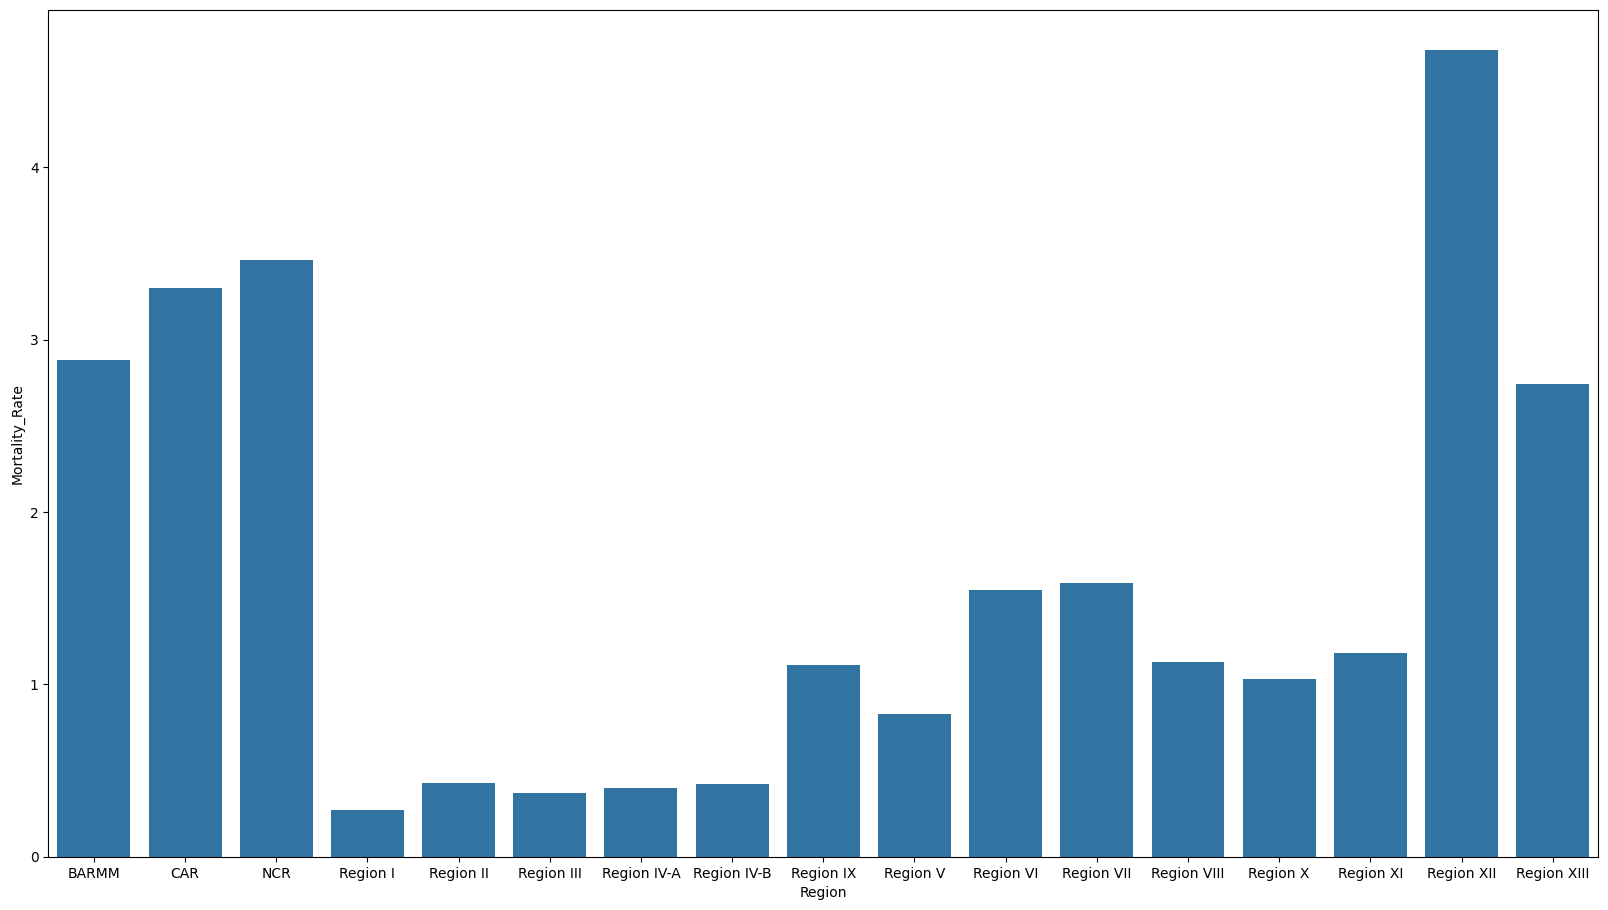

In [35]:
visual2 = sns.barplot(data=Regional_Death, x="Region",y="Mortality_Rate")
plt.gcf().set_size_inches(20,11)
plt.show()

<h3> Insight </h3>
<p> The DOH 7 reported that as of August 13, Region 7 has 11,403 confirmed dengue cases with 72 deaths. The DOH 7 said that 74 percent of the total number of confirmed dengue cases is in Cebu island. Cebu province has 4,457 cases with 27 mortalities.</p>

<h1> Mortality per Region thru Heat Map </h1>

In [36]:
# Group the data by region and year, then aggregate (e.g., sum, mean, etc.)
reg_death_yr = dengue.groupby(['Region', 'Year_Only']).agg({'Dengue_Cases': 'sum', 'Dengue_Deaths': 'sum'}).reset_index()

# Now you can calculate the mortality rate
reg_death_yr["Mortality_Rate"] = (reg_death_yr["Dengue_Deaths"] / reg_death_yr["Dengue_Cases"]) * 100

# Display the mortality rate per region and year
print(reg_death_yr[["Region", "Year_Only", "Dengue_Cases", "Dengue_Deaths", "Mortality_Rate"]])


KeyError: 'Year_Only'

In [37]:
reg_death_yr

NameError: name 'reg_death_yr' is not defined

In [38]:
dengue["Dengue_Deaths"]/dengue['Year'].dt.year

AttributeError: Can only use .dt accessor with datetimelike values

In [39]:
# Group the data by region and year, then aggregate (e.g., sum, mean, etc.)
reg_death_yr = dengue.groupby(['Region', 'Year_Only']).agg({'Dengue_Cases': 'sum', 'Dengue_Deaths': 'sum'}).reset_index()

# Calculate mortality rate
reg_death_yr["Mortality_Rate"] = (reg_death_yr["Dengue_Deaths"] / reg_death_yr["Dengue_Cases"]) * 100

# Reset index and create pivot table for heatmap
heatmap_data = reg_death_yr.pivot(index='Region', columns='Year_Only', values='Mortality_Rate')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('Mortality Rate of Dengue Cases per Region and Year')
plt.xlabel('Year')
plt.ylabel('Region')
plt.xticks(rotation=45)
plt.show()

KeyError: 'Year_Only'

<h2> Insight </h2><br>
<p> The graph showed an alarming motality rate of dengue cases and deaths from 2016 to 2020, and upon closer examination the visualization clearly indicate a high mortality in NCR during 2016, and also in the BARMM Region with 11 percent death rate. On 2017, regions 6,7,8,9,10 and 11 indicate a high mmortality rate during that yar. </p>

<h1> PREDICTIVE ANALYTICS </h1>

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming your dataset is stored in a DataFrame called df
# Convert Year to numeric if it's currently stored as datetime
# df['Year'] = df['Year'].dt.year

# Check the data types of your features
print(dengue.dtypes)

# Convert Dengue_Cases to numeric if it's not already
# df['Dengue_Cases'] = pd.to_numeric(df['Dengue_Cases'])

dengue['Year'] = pd.to_numeric(dengue['Year'])
dengue['Dengue_Cases'] = pd.to_numeric(dengue['Dengue_Cases'])
# Split the data into features (X) and target variable (y)
X = dengue['Year'].values.reshape(-1, 1)
y = dengue['Dengue_Cases'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dengue['Year'] = pd.to_datetime(dengue['Year'], format='%Y')
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Make a prediction for a new year
new_year = 2025
new_cases = model.predict([[new_year]])
print("Predicted number of dengue cases in", new_year, ":", new_cases[0])


ModuleNotFoundError: No module named 'sklearn'

In [41]:

plt.scatter(X_train, y_train, color='blue', label='Training Data')


plt.scatter(X_test, y_test, color='red', label='Test Data')


plt.plot(X_test, y_pred, color='green', linewidth=3, label='Regression Line')


plt.xlabel('Year')
plt.ylabel('Dengue Cases')
plt.title('Linear Regression of Dengue Cases Over Time')
plt.legend()

# Show plot
plt.gcf().set_size_inches(20,11)
plt.show()


NameError: name 'X_train' is not defined

In [42]:
dengue['Year'] = pd.to_datetime(dengue['Year'], format='%Y')

In [43]:
dengue_NCR = dengue.groupby([{dengue[dengue["Region"]=="NCR"],["Dengue_Deaths"]}]).sum()

TypeError: unhashable type: 'DataFrame'

In [44]:
dengue_NCR = dengue[dengue["Region"]=="NCR"].groupby("Region")["Dengue_Cases"].sum()

In [45]:
dengue_NCR

Region
NCR    115966
Name: Dengue_Cases, dtype: int64

In [46]:
dengue["Region"]=="NCR"

0       False
1       False
2       False
3       False
4       False
        ...  
1015    False
1016    False
1017    False
1018    False
1019    False
Name: Region, Length: 1020, dtype: bool

In [47]:
dengue.head()

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016-01-01,Region I,705,1
1,February,2016-01-01,Region I,374,0
2,March,2016-01-01,Region I,276,0
3,April,2016-01-01,Region I,240,2
4,May,2016-01-01,Region I,243,1


In [48]:
dengue_NCR_2016 = dengue[(dengue["Region"]=="NCR") & (dengue["Year"]=="2016")]["Dengue_Cases"].sum()


In [49]:
dengue_NCR_2016

np.int64(13002)

In [50]:
dengue["Year"] == "2016"

0        True
1        True
2        True
3        True
4        True
        ...  
1015    False
1016    False
1017    False
1018    False
1019    False
Name: Year, Length: 1020, dtype: bool

<h1>Insight No.1 Monthly Dengue Cases Trend</h1>
<h3>The data shows that dengue cases peak during certain months, often aligning with the rainy season when mosquito breeding is more prevalent. This suggests a strong seasonal pattern in dengue transmission that can inform early warning and prevention strategies.</h3>

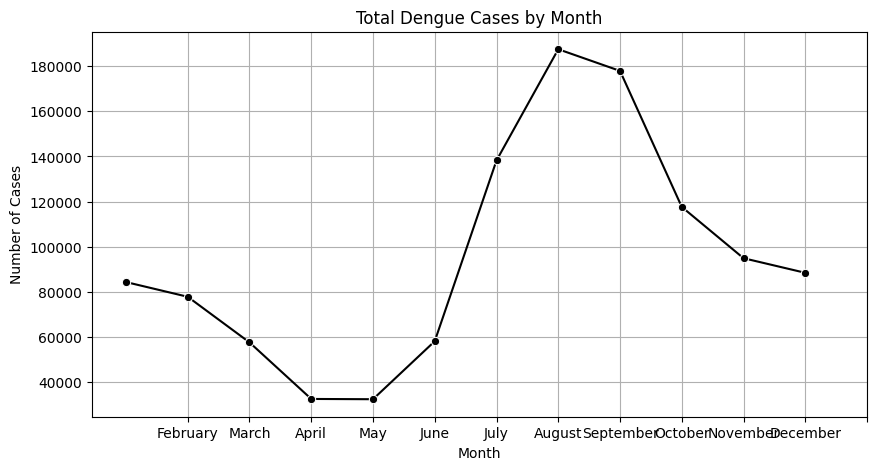

In [51]:
monthly_cases = dengue.groupby('Month')['Dengue_Cases'].sum().sort_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_cases.index, y=monthly_cases.values, marker='o', color='black')
plt.title('Total Dengue Cases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.xticks(range(1,13))
plt.grid(True)
plt.show()


<h1>Insight No.2 Yearly Dengue Cases Trend</h1>
<h3>Yearly trends reveal fluctuations in the number of dengue cases, with certain years experiencing significant outbreaks. These spikes may be linked to climate conditions, public health interventions, or reporting efficiency.</h3>

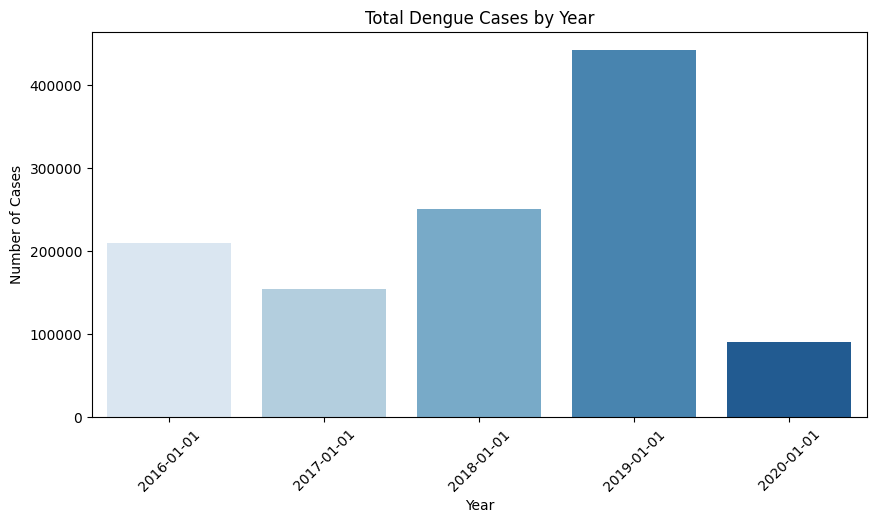

In [52]:
yearly_cases = dengue.groupby('Year')['Dengue_Cases'].sum()

plt.figure(figsize=(10,5))
sns.barplot(x=yearly_cases.index, y=yearly_cases.values, palette='Blues', color='black')
plt.title('Total Dengue Cases by Year')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()


<h1>Insight 3 Top 10 Most Affected Regions</h1>
<h3>A small number of regions account for a disproportionately high number of dengue cases. This highlights geographic hotspots that should be prioritized for mosquito control, health education, and medical preparedness.</h3>

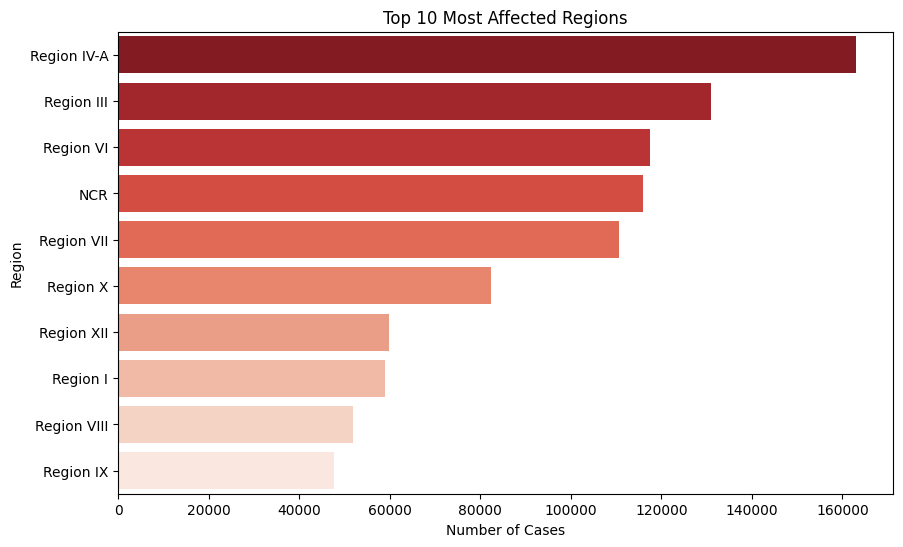

In [53]:
region_cases = dengue.groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=region_cases.index, x=region_cases.values, palette='Reds_r')
plt.title('Top 10 Most Affected Regions')
plt.xlabel('Number of Cases')
plt.ylabel('Region')
plt.show()


<h1>Insight 4 Top 10 Regions by Dengue Deaths</h1>
<h3>Regions with the highest death counts may not always be the ones with the most cases, suggesting potential gaps in access to healthcare or timely treatment. These areas may benefit from enhanced medical infrastructure and faster diagnosis protocols.</h3>

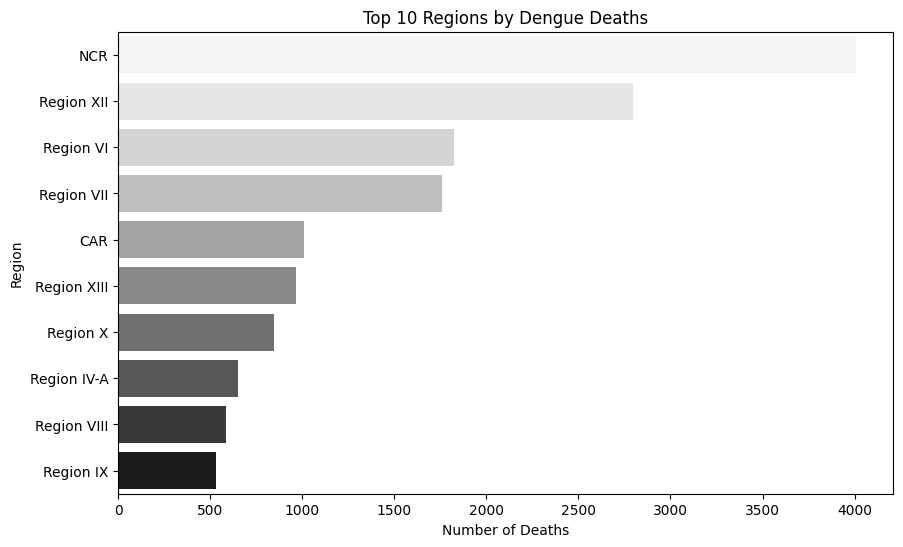

In [54]:
region_deaths = dengue.groupby('Region')['Dengue_Deaths'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=region_deaths.index, x=region_deaths.values, palette='Greys', color='black')
plt.title('Top 10 Regions by Dengue Deaths')
plt.xlabel('Number of Deaths')
plt.ylabel('Region')
plt.show()


<h1>Insight 5 Monthly Case vs Death Comparison</h1>
<h3>The months with the highest case counts also tend to show a corresponding increase in deaths, though not always proportionally. This comparison is useful for identifying periods of the year when the healthcare system may be under the most stress.</h3>

monthly_summary = dengue.groupby('Month')[['Dengue_Cases', 'Dengue_Deaths']].sum().sort_index()

monthly_summary.plot(kind='bar', figsize=(12,6), colormap='Set1')
plt.title('Monthly Dengue Cases and Deaths')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Metric')
plt.grid(True)
plt.show()


<h1>Insight No 6 Year-on-Year Dengue Death Rate (%)</h1>
<h3>While the number of cases may rise and fall each year, the death rate can reveal how well the disease is being managed. A stable or declining death rate over time could indicate improvements in diagnosis, treatment, and public awareness.</h3>

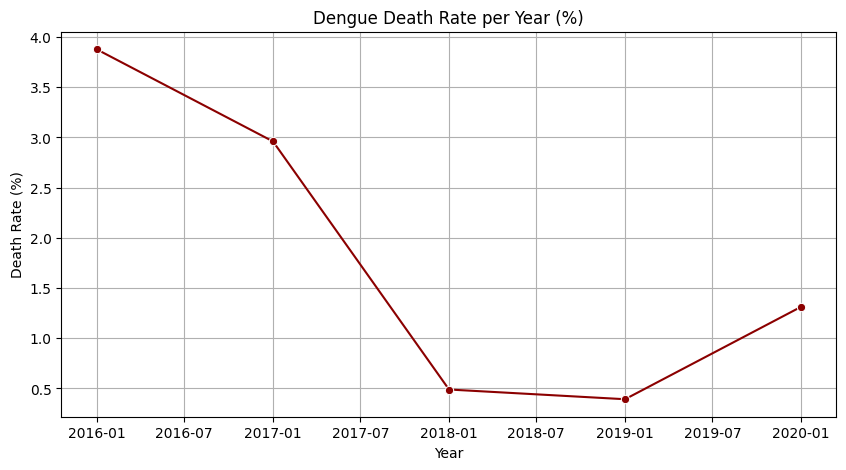

In [55]:
yearly_summary = dengue.groupby('Year')[['Dengue_Cases', 'Dengue_Deaths']].sum()
yearly_summary['Death_Rate (%)'] = (yearly_summary['Dengue_Deaths'] / yearly_summary['Dengue_Cases']) * 100

plt.figure(figsize=(10,5))
sns.lineplot(data=yearly_summary, x=yearly_summary.index, y='Death_Rate (%)', marker='o', color='darkred')
plt.title('Dengue Death Rate per Year (%)')
plt.xlabel('Year')
plt.ylabel('Death Rate (%)')
plt.grid(True)
plt.show()


<h1>Insight No 7 Case Fatality Ratio by Region</h1>
<h3>Some regions have higher fatality rates despite not having the highest case numbers, which could suggest delayed access to care or underreporting of mild cases. This is critical for targeting medical training and emergency resources.</h3>

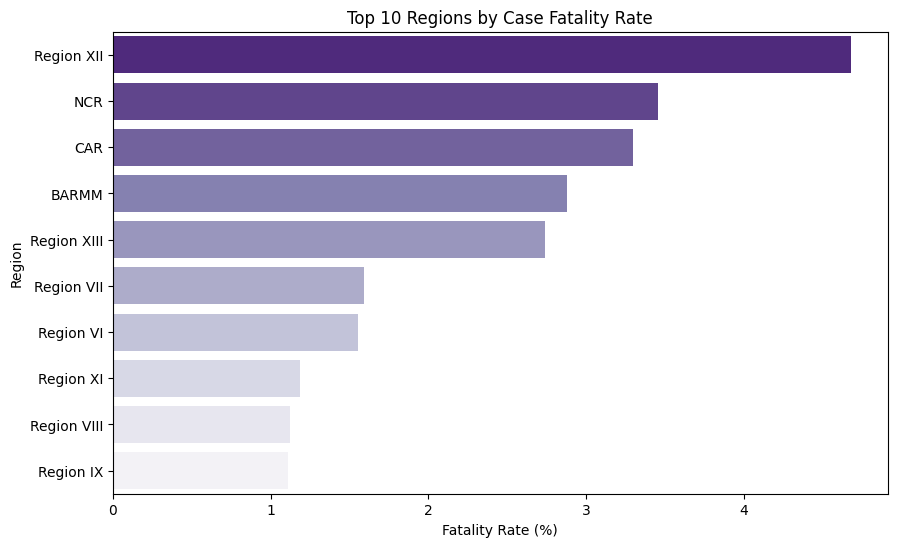

In [56]:
fatality_by_region = dengue.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].sum()
fatality_by_region['Fatality_Rate (%)'] = (fatality_by_region['Dengue_Deaths'] / fatality_by_region['Dengue_Cases']) * 100
fatality_by_region = fatality_by_region.sort_values('Fatality_Rate (%)', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Fatality_Rate (%)', y=fatality_by_region.index, data=fatality_by_region, palette='Purples_r')
plt.title('Top 10 Regions by Case Fatality Rate')
plt.xlabel('Fatality Rate (%)')
plt.ylabel('Region')
plt.show()


<h1>Insight No 8 Heatmap of Dengue Cases by Month and Year</h1>
<h3>This heatmap clearly illustrates seasonal outbreaks and helps identify specific years when outbreaks were unusually intense. Patterns like these can support predictive modeling and early intervention programs.</h3>

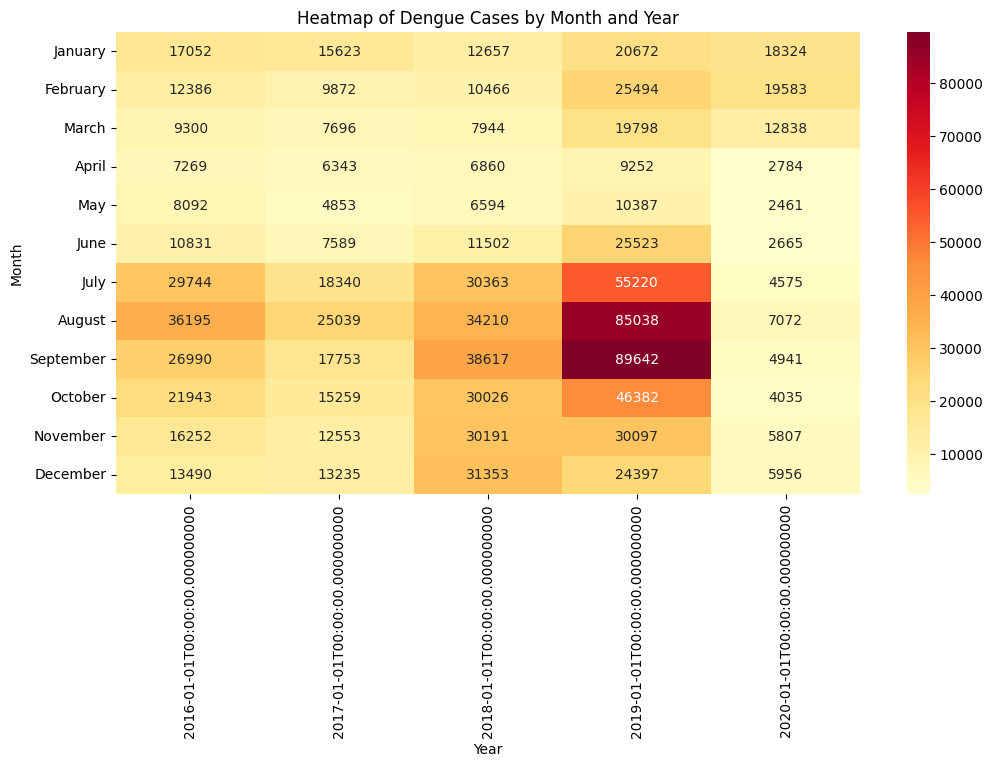

In [57]:
pivot = dengue.pivot_table(index='Month', columns='Year', values='Dengue_Cases', aggfunc='sum')

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap='YlOrRd', annot=True, fmt='.0f')
plt.title('Heatmap of Dengue Cases by Month and Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()


<h1>Insight No 9 Annual Decline or Rise in Cases</h1>
<h3>A positive value indicates a rise in cases from the previous year, while a negative value indicates improvement. This is useful for evaluating the impact of dengue prevention strategies over time.</h3>

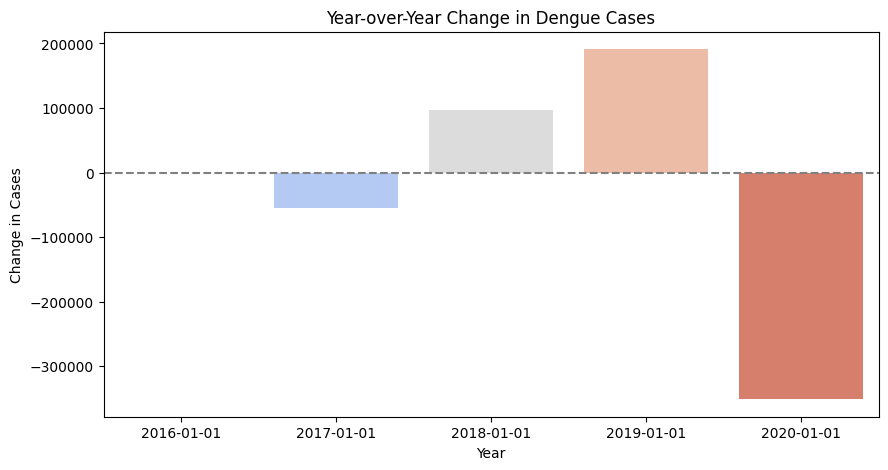

In [58]:
yearly_cases = dengue.groupby('Year')['Dengue_Cases'].sum()
yearly_diff = yearly_cases.diff().fillna(0)

plt.figure(figsize=(10,5))
sns.barplot(x=yearly_diff.index, y=yearly_diff.values, palette='coolwarm')
plt.title('Year-over-Year Change in Dengue Cases')
plt.xlabel('Year')
plt.ylabel('Change in Cases')
plt.axhline(0, color='gray', linestyle='--')
plt.show()


<h1>Insight No 10 Dengue Case-to-Death Ratio by Year</h1>
<h3>A rising case-to-death ratio over time suggests better survival rates, likely due to improved healthcare delivery or early diagnosis. It's an encouraging metric when evaluating the success of public health campaigns.</h3>

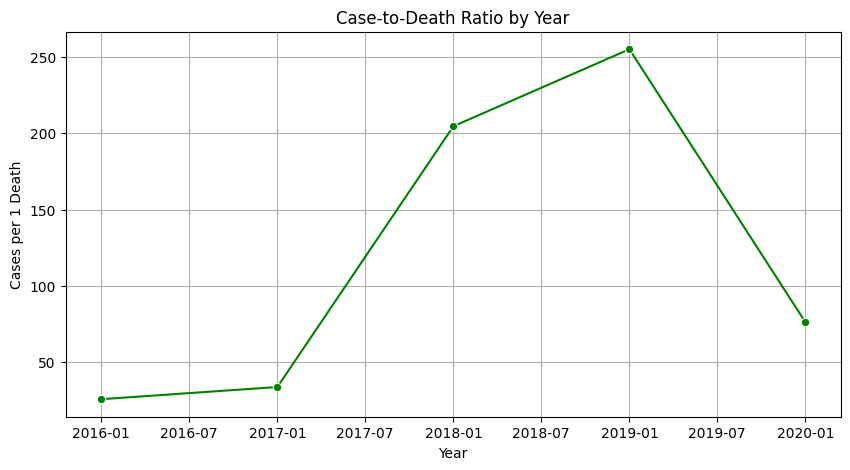

In [59]:
year_summary = dengue.groupby('Year')[['Dengue_Cases', 'Dengue_Deaths']].sum()
year_summary['Case_to_Death_Ratio'] = year_summary['Dengue_Cases'] / year_summary['Dengue_Deaths']

plt.figure(figsize=(10,5))
sns.lineplot(x=year_summary.index, y=year_summary['Case_to_Death_Ratio'], marker='o', color='green')
plt.title('Case-to-Death Ratio by Year')
plt.xlabel('Year')
plt.ylabel('Cases per 1 Death')
plt.grid(True)
plt.show()


<h1>Insight No 11 Region Contribution to National Totals</h1>
<h3>A few regions contribute a large share of total dengue cases, revealing disproportionate burdens. Focusing efforts on these key regions could have a significant impact on national case reduction.</h3>

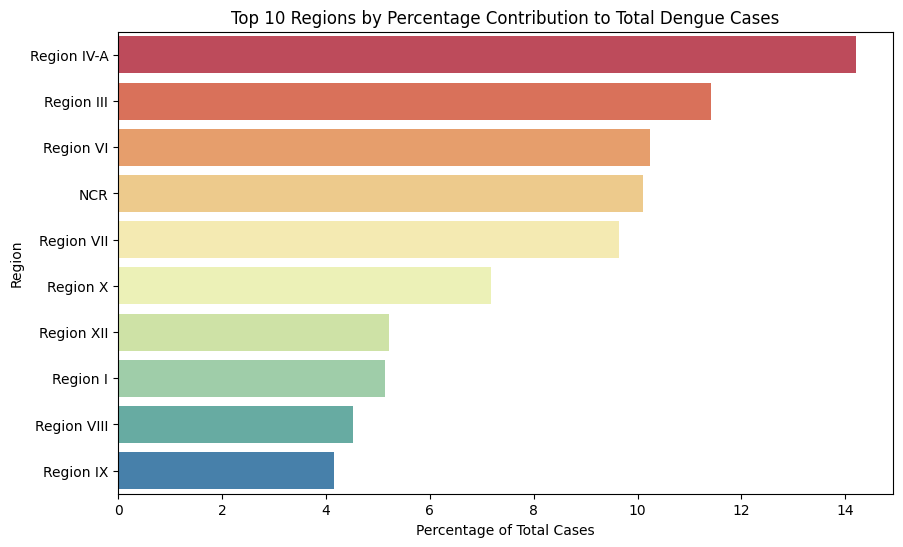

In [60]:
total_cases = dengue['Dengue_Cases'].sum()
region_contrib = dengue.groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=False)
region_percent = (region_contrib / total_cases) * 100

plt.figure(figsize=(10,6))
sns.barplot(y=region_percent.index[:10], x=region_percent.values[:10], palette='Spectral')
plt.title('Top 10 Regions by Percentage Contribution to Total Dengue Cases')
plt.xlabel('Percentage of Total Cases')
plt.ylabel('Region')
plt.show()


<h1>Insight No 12 Regional Dengue Trend Over Time</h1>
<h3>Some regions show a steady increase in cases, while others fluctuate more drastically. This view helps compare regional performance in dengue control over time.</h3>

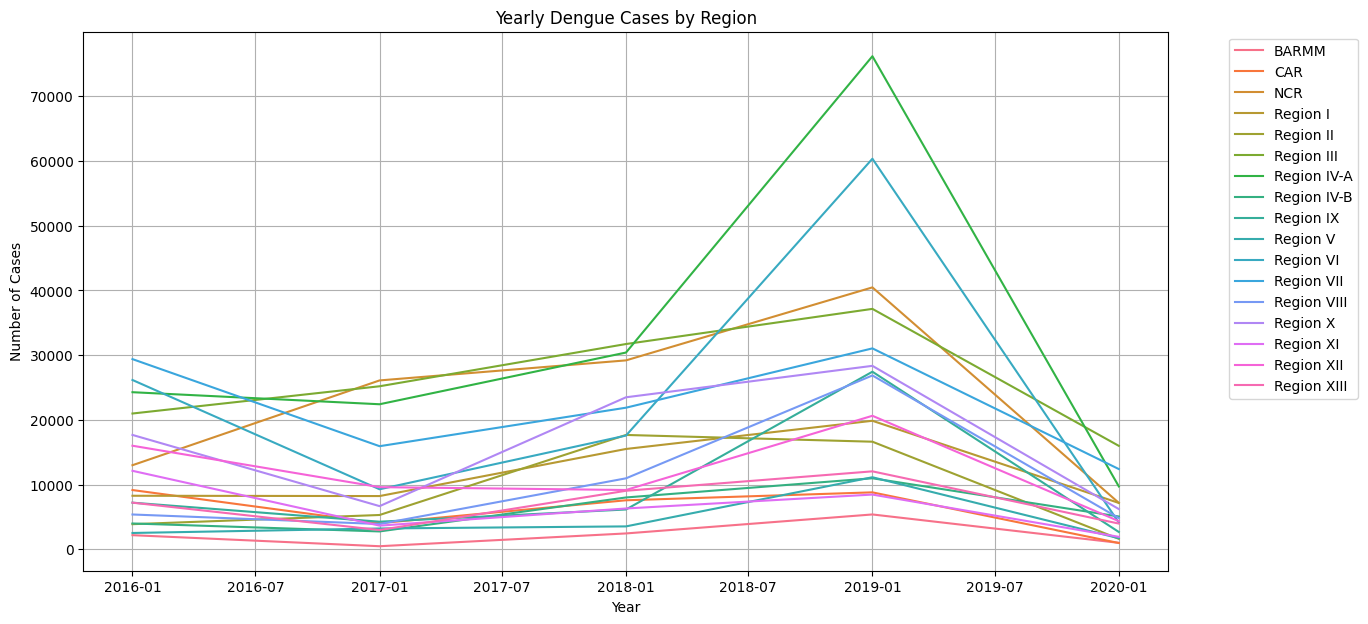

In [61]:
region_year = dengue.groupby(['Year', 'Region'])['Dengue_Cases'].sum().reset_index()

plt.figure(figsize=(14,7))
sns.lineplot(data=region_year, x='Year', y='Dengue_Cases', hue='Region')
plt.title('Yearly Dengue Cases by Region')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


<h1>Insight No 13 Monthly Average Cases Across All Years</h1>
<h3>Averaging cases over multiple years reduces outliers and shows clear seasonal peaks. This supports early preparation and education campaigns before high-risk months begin.</h3>

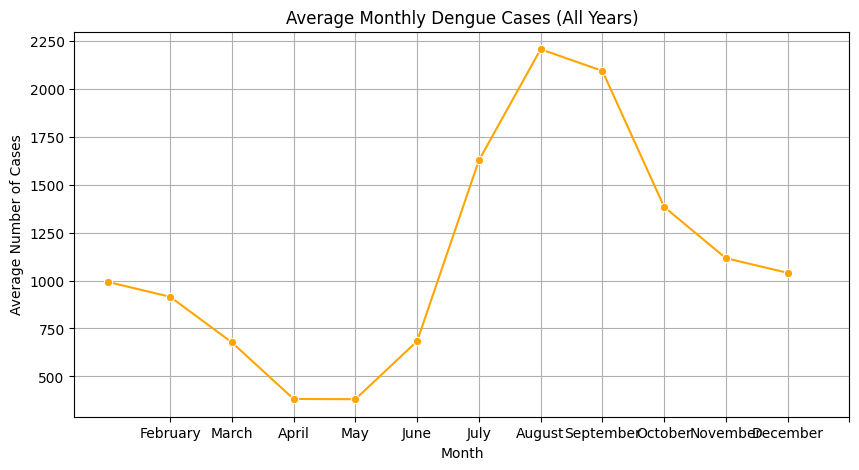

In [62]:
avg_monthly = dengue.groupby('Month')['Dengue_Cases'].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=avg_monthly.index, y=avg_monthly.values, marker='o', color='orange')
plt.title('Average Monthly Dengue Cases (All Years)')
plt.xlabel('Month')
plt.ylabel('Average Number of Cases')
plt.xticks(range(1,13))
plt.grid(True)
plt.show()


<h1>Insight No 14 Total Deaths Over Time</h1>
<h3>While case numbers may vary, this chart allows you to assess if the death toll is stabilizing or worsening. A declining trend could reflect better access to treatment or faster response times.</h3>

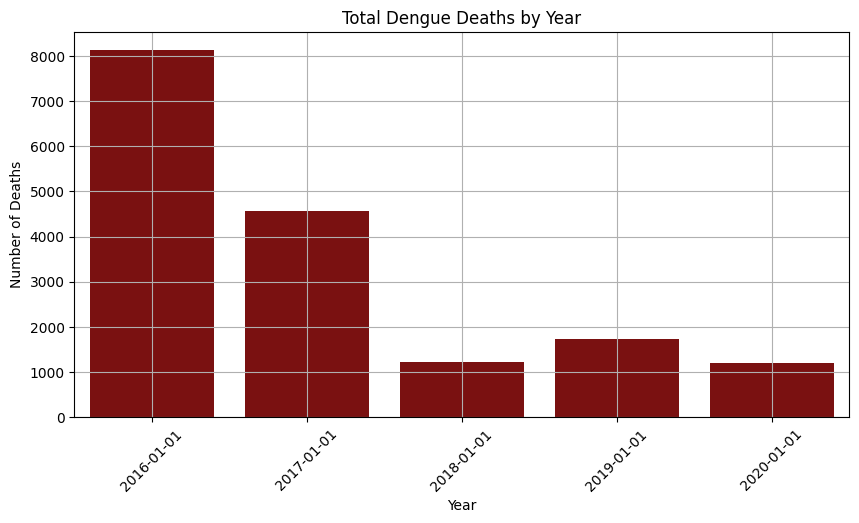

In [63]:
deaths_by_year = dengue.groupby('Year')['Dengue_Deaths'].sum()

plt.figure(figsize=(10,5))
sns.barplot(x=deaths_by_year.index, y=deaths_by_year.values, color='darkred')
plt.title('Total Dengue Deaths by Year')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<h1>Insight No 15 Percentage Change in Cases Year-on-Year</h1>
<h3>This percentage view highlights both outbreak surges and successful intervention years. It's a quick way to measure volatility and effectiveness of public health responses.</h3>

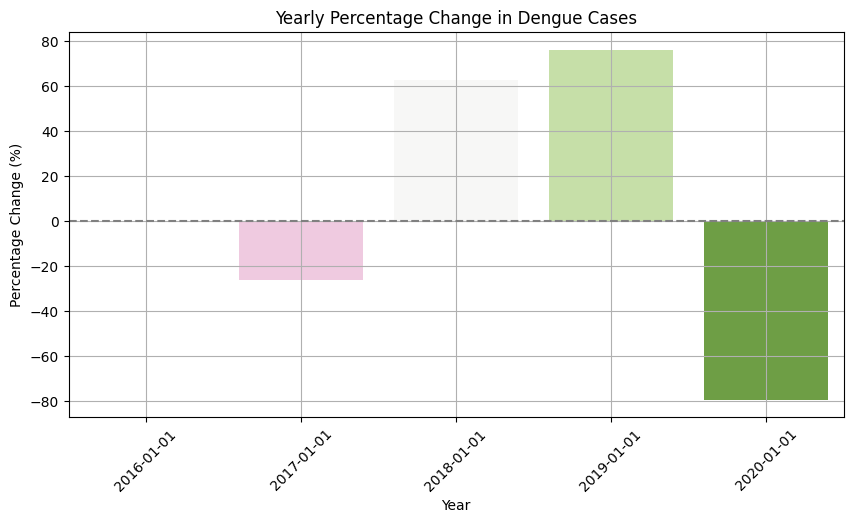

In [64]:
case_change = dengue.groupby('Year')['Dengue_Cases'].sum().pct_change() * 100

plt.figure(figsize=(10,5))
sns.barplot(x=case_change.index, y=case_change.values, palette='PiYG')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Yearly Percentage Change in Dengue Cases')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<h1>Insight No 16 Deaths as Proportion of Cases by Month</h1>
<h3>This shows not just when dengue is most common, but when it tends to be deadliest. Certain months may require additional hospital capacity or community education.</h3>

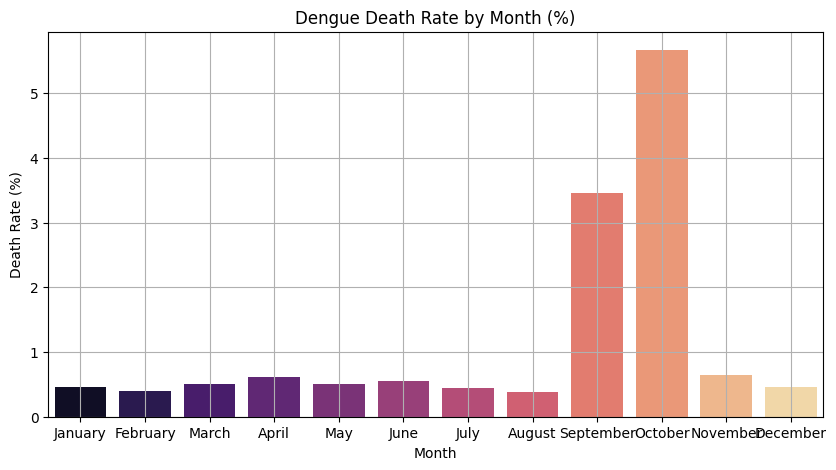

In [65]:
monthly_summary = dengue.groupby('Month')[['Dengue_Cases', 'Dengue_Deaths']].sum()
monthly_summary['Death_Rate (%)'] = (monthly_summary['Dengue_Deaths'] / monthly_summary['Dengue_Cases']) * 100

plt.figure(figsize=(10,5))
sns.barplot(x=monthly_summary.index, y=monthly_summary['Death_Rate (%)'], palette='magma')
plt.title('Dengue Death Rate by Month (%)')
plt.xlabel('Month')
plt.ylabel('Death Rate (%)')
plt.grid(True)
plt.show()


<h1>Insight No 17 Total Dengue Cases Per Year</h1>
<h3>By grouping the data by Year, we can find trends over time. This would show whether dengue cases are increasing, decreasing, or fluctuating year by year.
</h3>

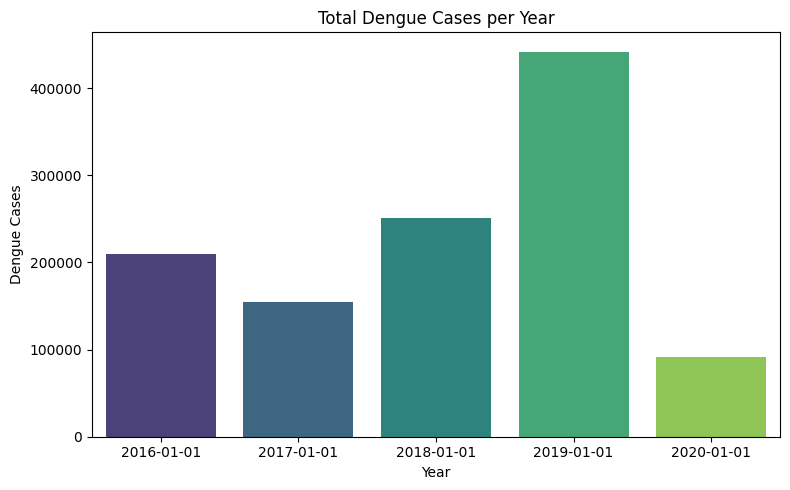

In [66]:
yearly_cases = dengue.groupby('Year')['Dengue_Cases'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Year', y='Dengue_Cases', data=yearly_cases, palette='viridis')
plt.title("Total Dengue Cases per Year")
plt.ylabel("Dengue Cases")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

<h1>Insight No 18 Peak Dengue Months Across All Years</h1>
<h3>Aggregating data by Month regardless of year can show which months typically experience the highest dengue cases — possibly pointing to seasonal or climate-related patterns.</h3>


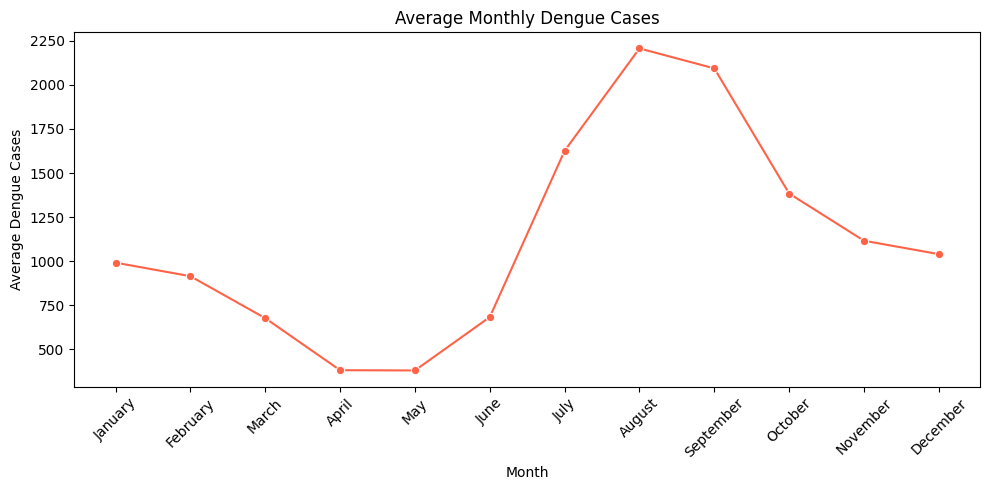

In [67]:
monthly_avg = dengue.groupby('Month')['Dengue_Cases'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x='Month', y='Dengue_Cases', data=monthly_avg, marker='o', color='tomato')
plt.title("Average Monthly Dengue Cases")
plt.ylabel("Average Dengue Cases")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1>Insight No 19 Regional Comparison of Dengue Cases</h1>
<h3>By summing cases by Region, we can determine which regions are most and least affected. This is useful for targeted health responses.</h3>

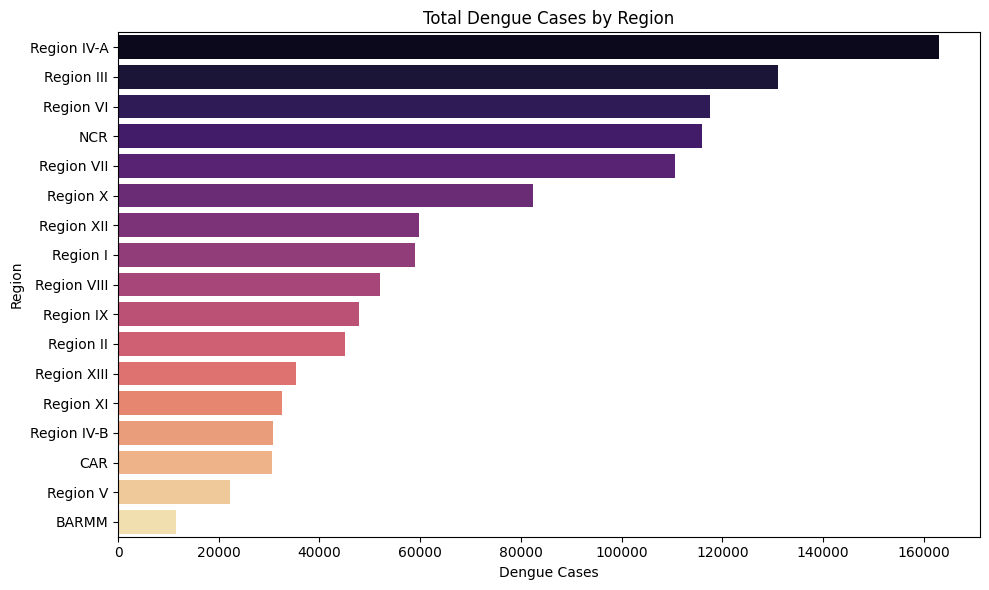

In [68]:
region_cases = dengue.groupby('Region')['Dengue_Cases'].sum().reset_index().sort_values(by='Dengue_Cases', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(y='Region', x='Dengue_Cases', data=region_cases, palette='magma')
plt.title("Total Dengue Cases by Region")
plt.xlabel("Dengue Cases")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

<h1>Insight No 20 Death Rate by Region</h1>
<h3>By calculating the death-to-case ratio per region, we can assess which areas may have more severe outbreaks or less effective healthcare.</h3>

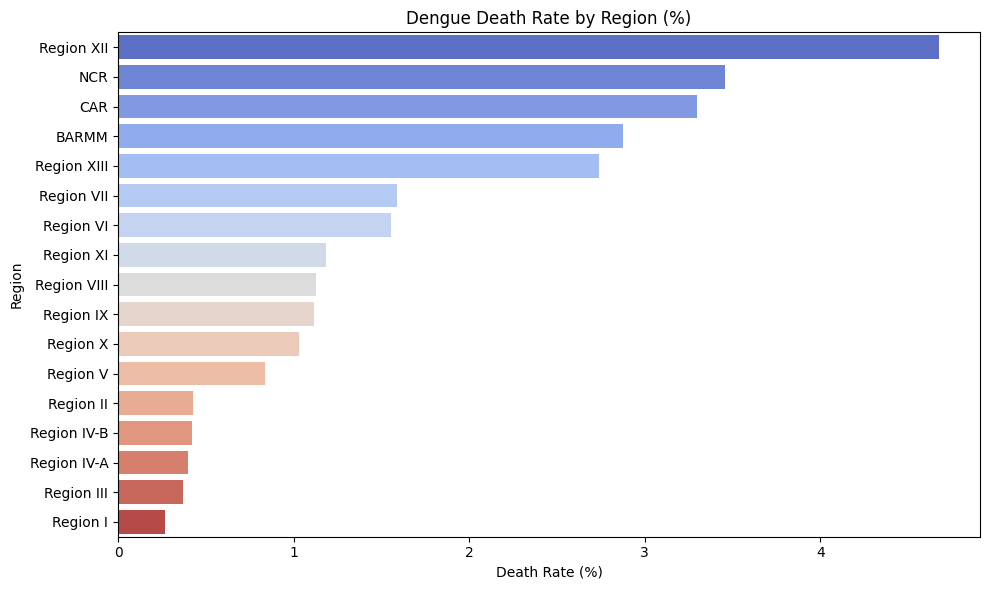

In [69]:
death_rate = dengue.groupby('Region')[['Dengue_Deaths', 'Dengue_Cases']].sum().reset_index()
death_rate['Death_Rate'] = (death_rate['Dengue_Deaths'] / death_rate['Dengue_Cases']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(y='Region', x='Death_Rate', data=death_rate.sort_values(by='Death_Rate', ascending=False), palette='coolwarm')
plt.title("Dengue Death Rate by Region (%)")
plt.xlabel("Death Rate (%)")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

<h1>Regions Dengue Cases</h1>

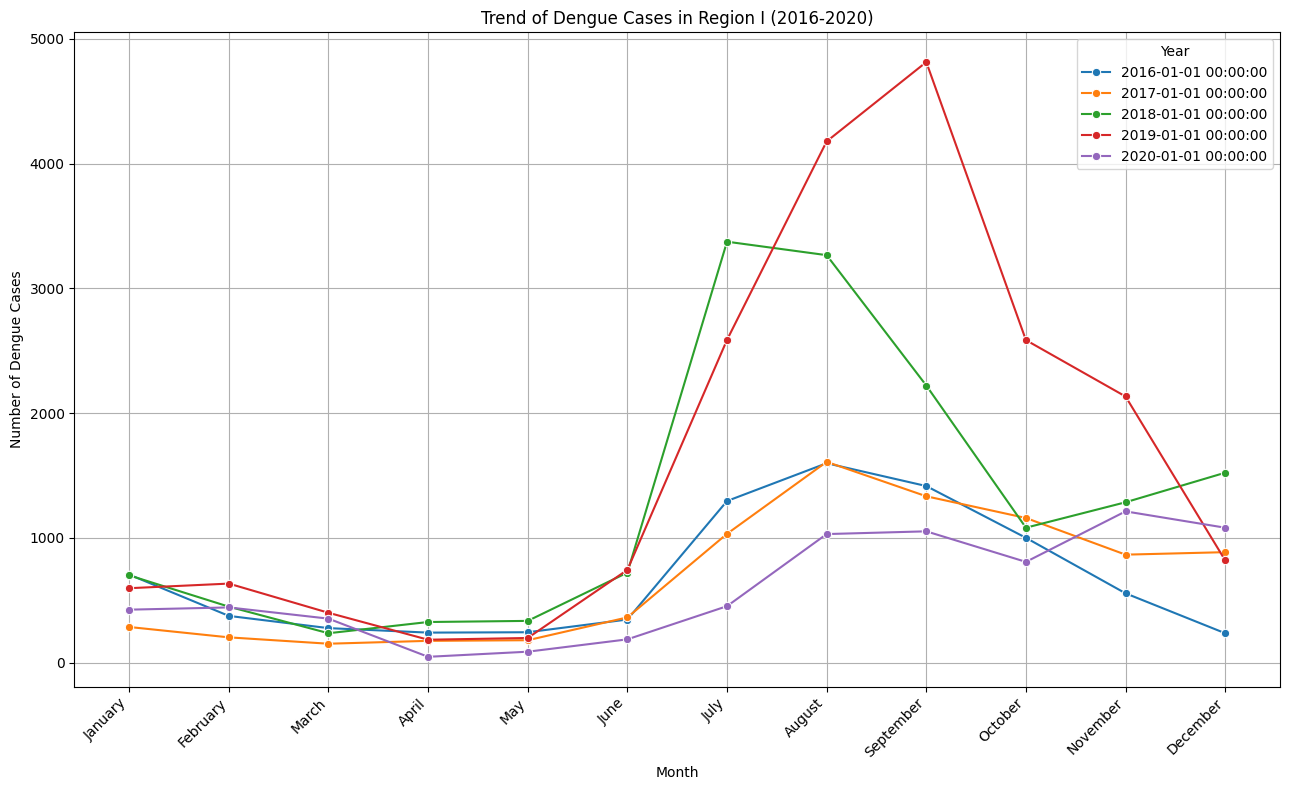

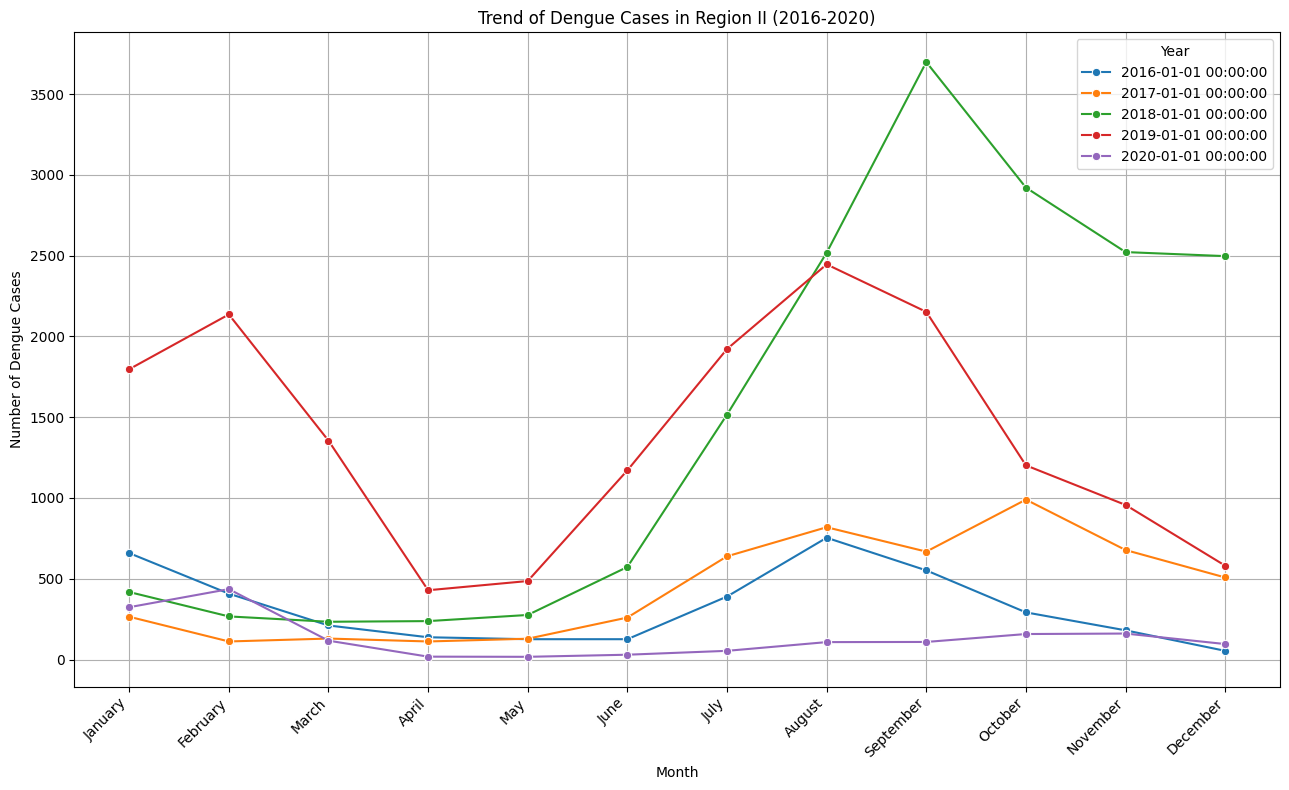

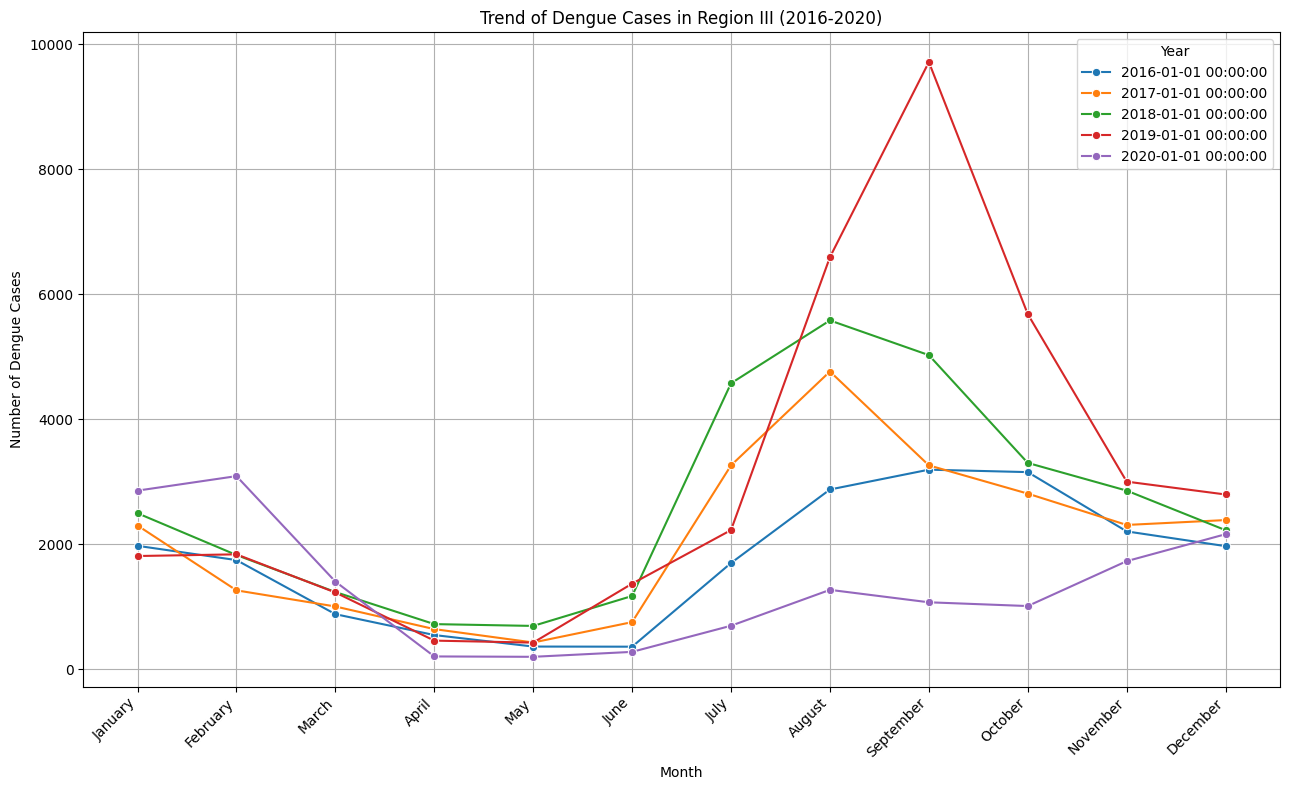

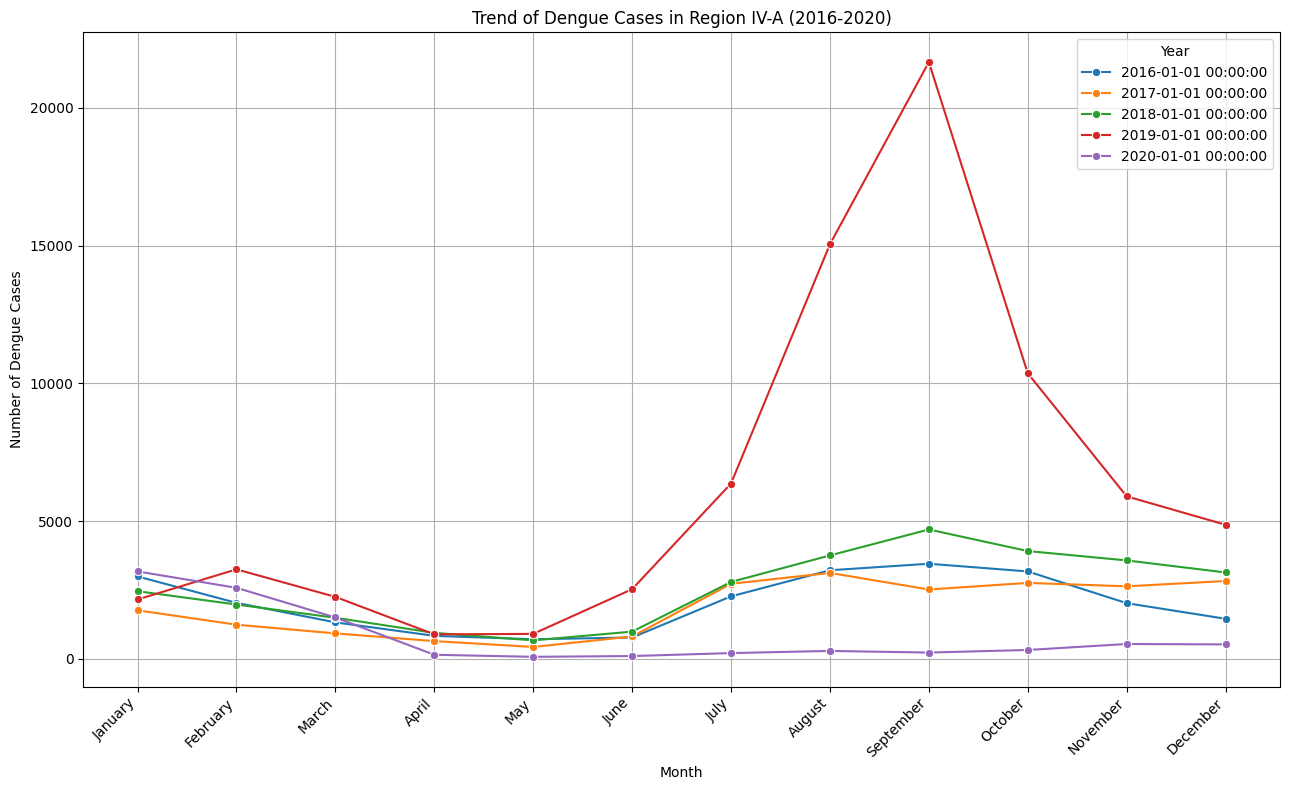

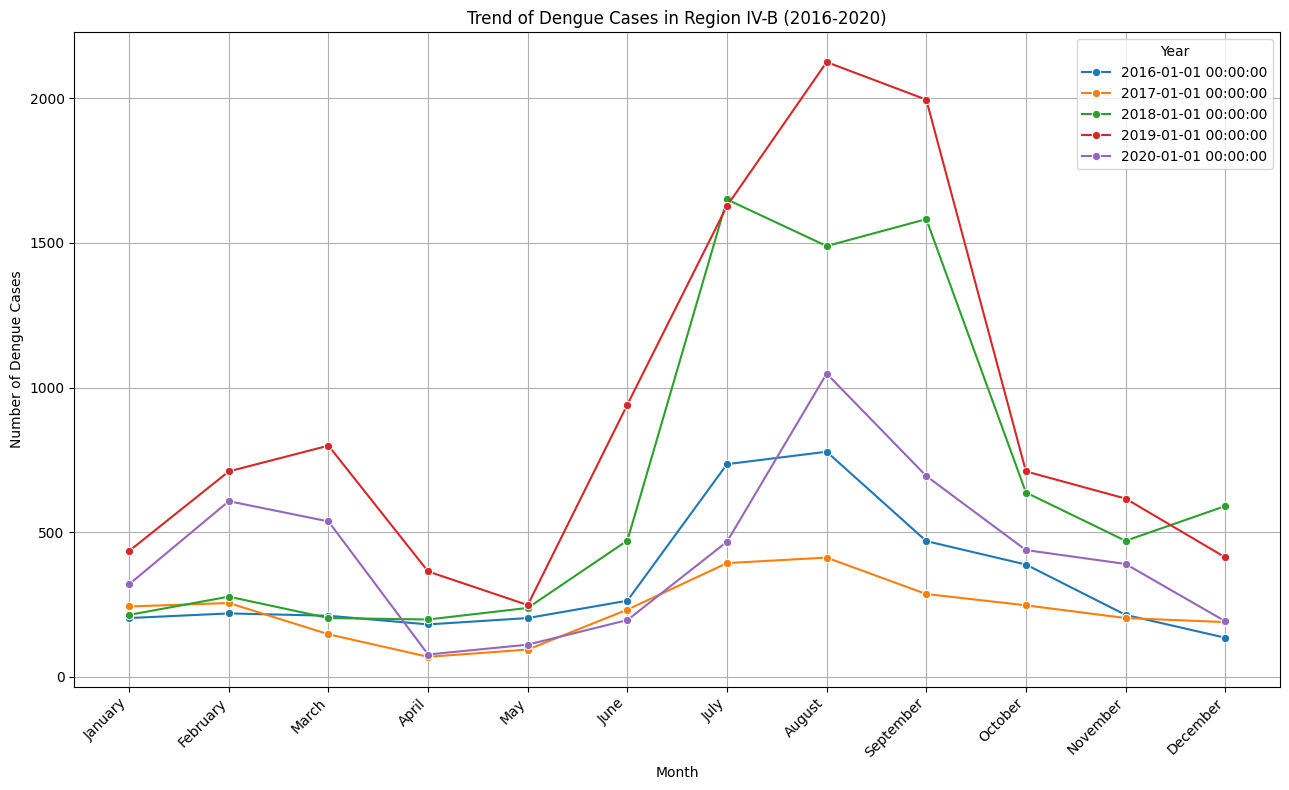

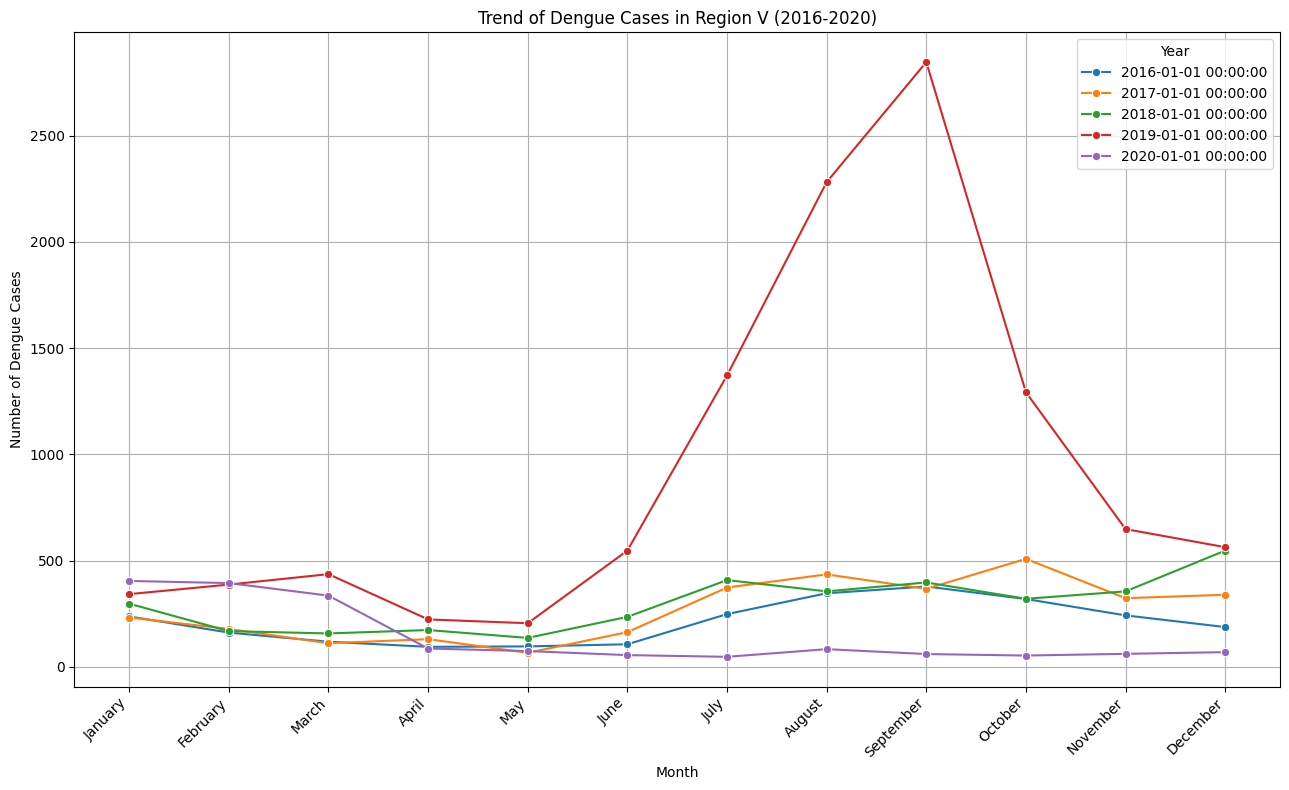

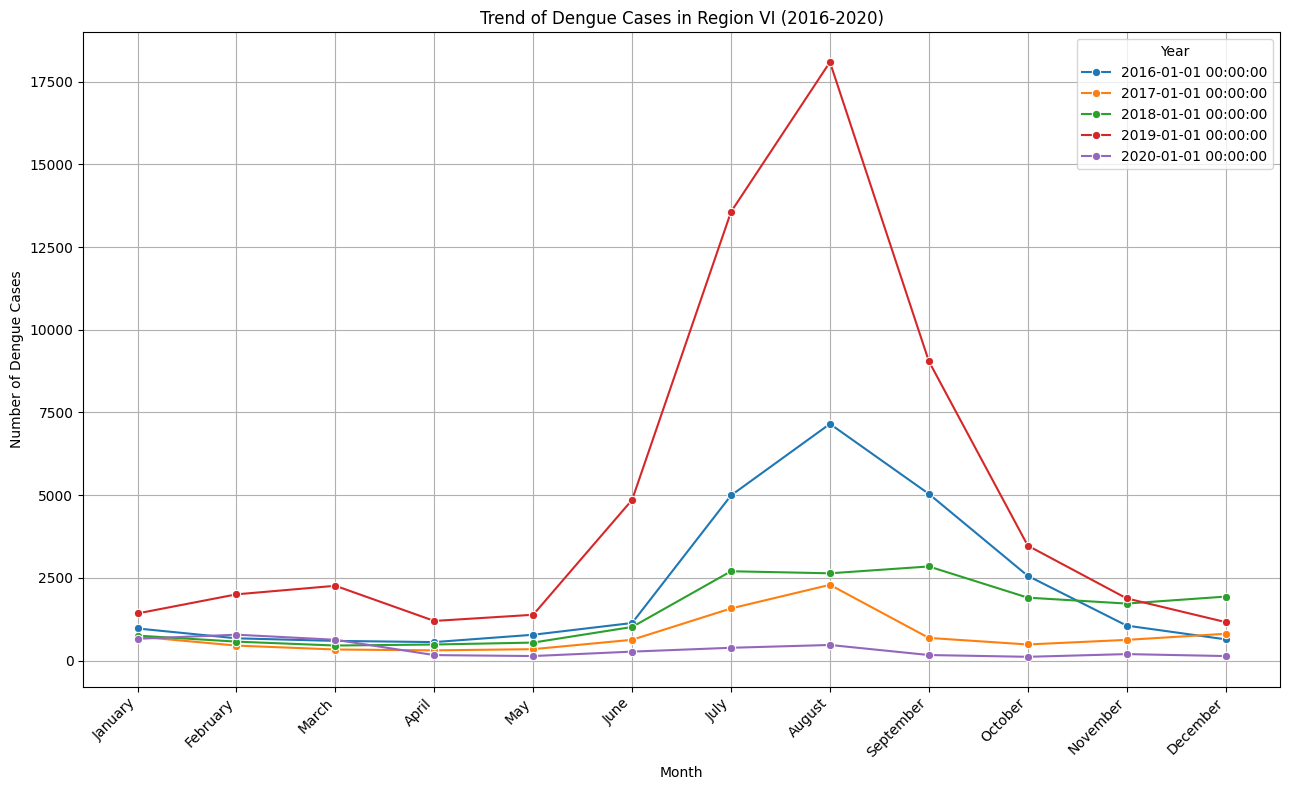

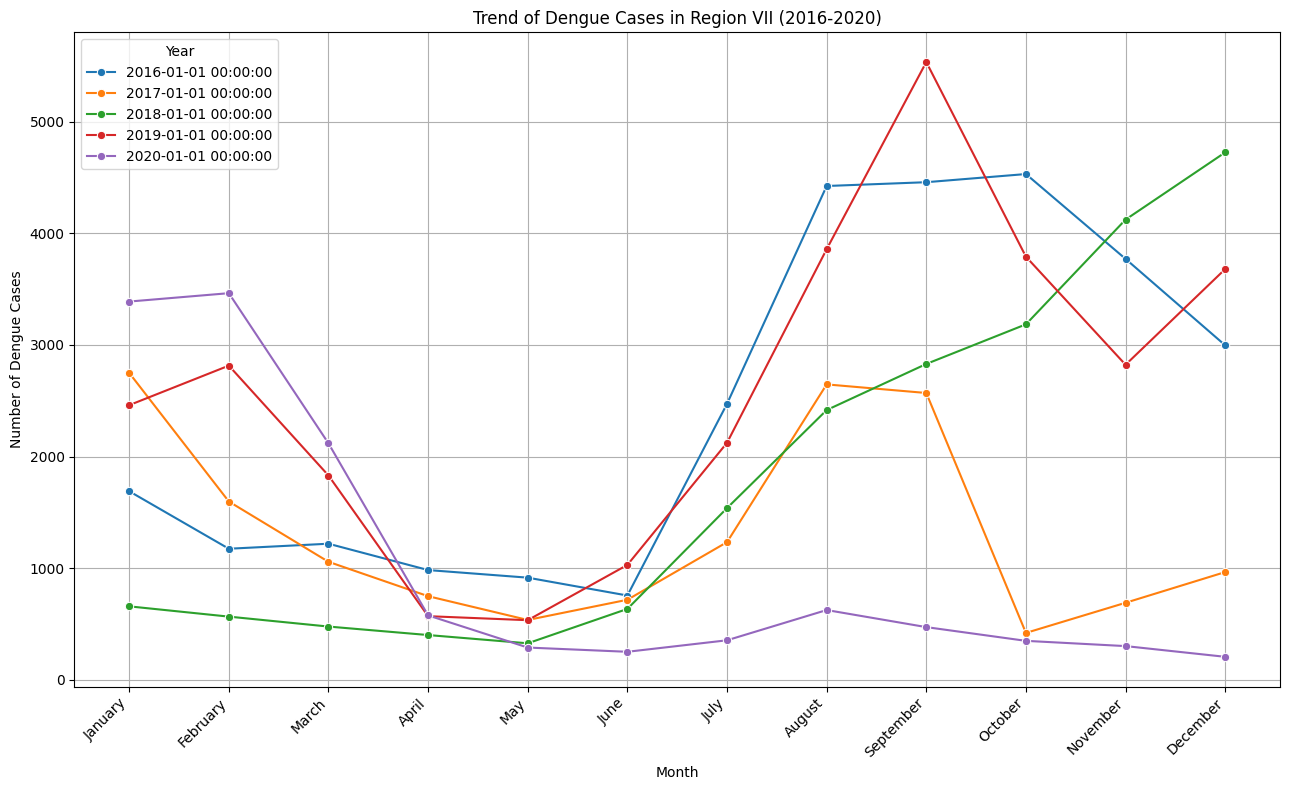

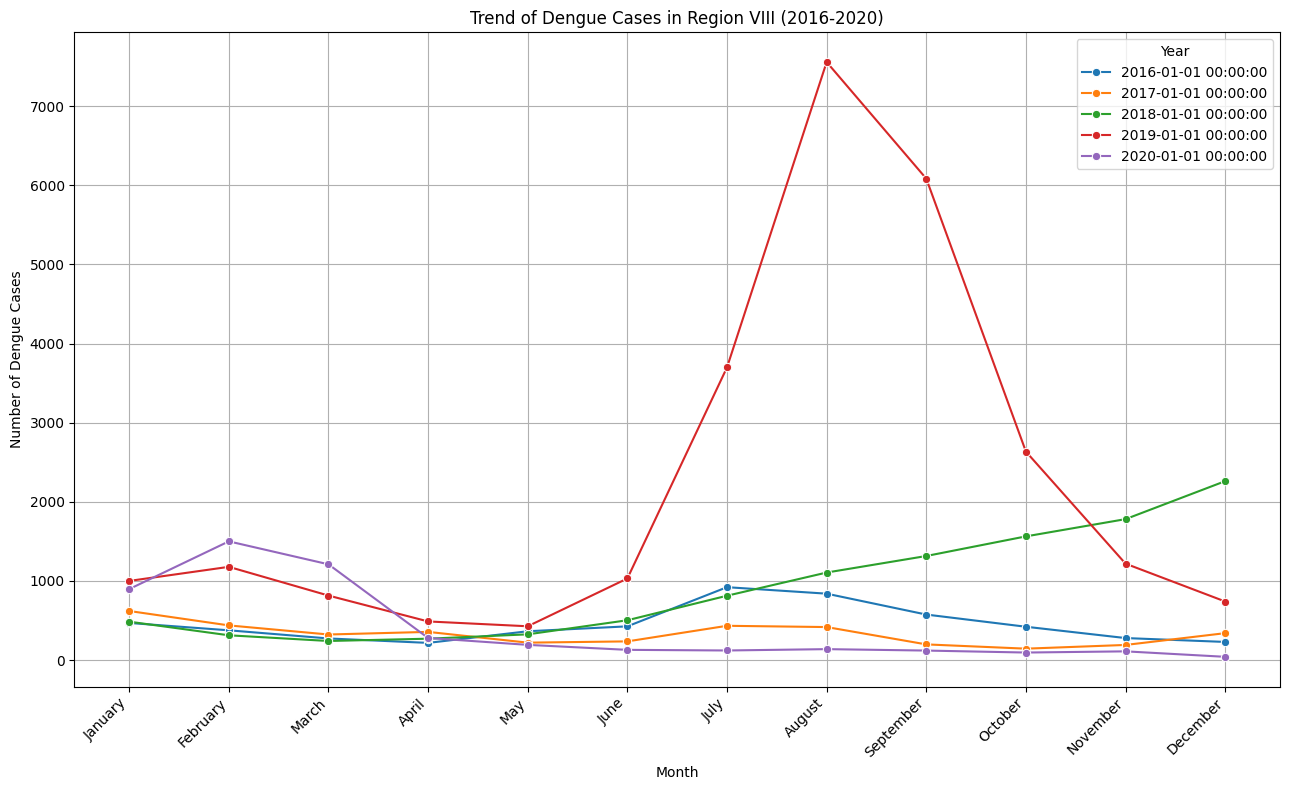

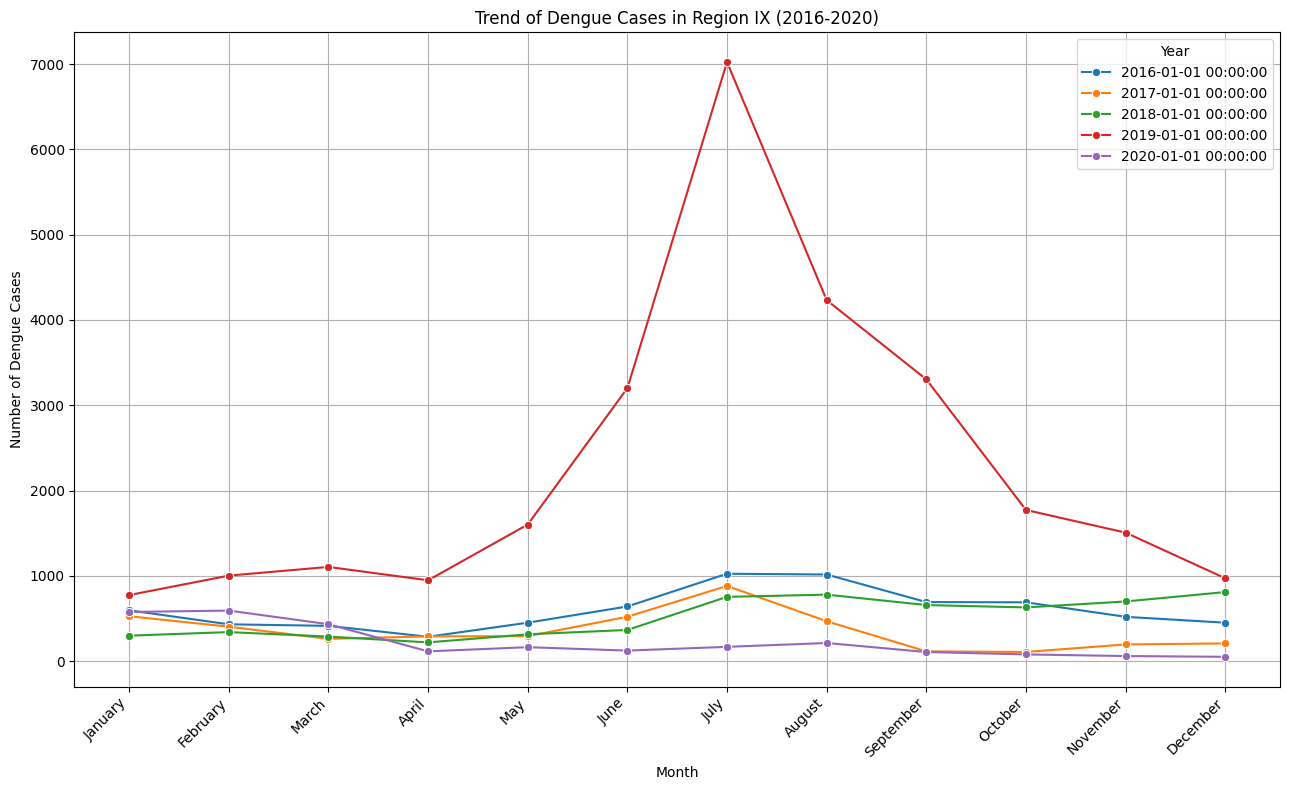

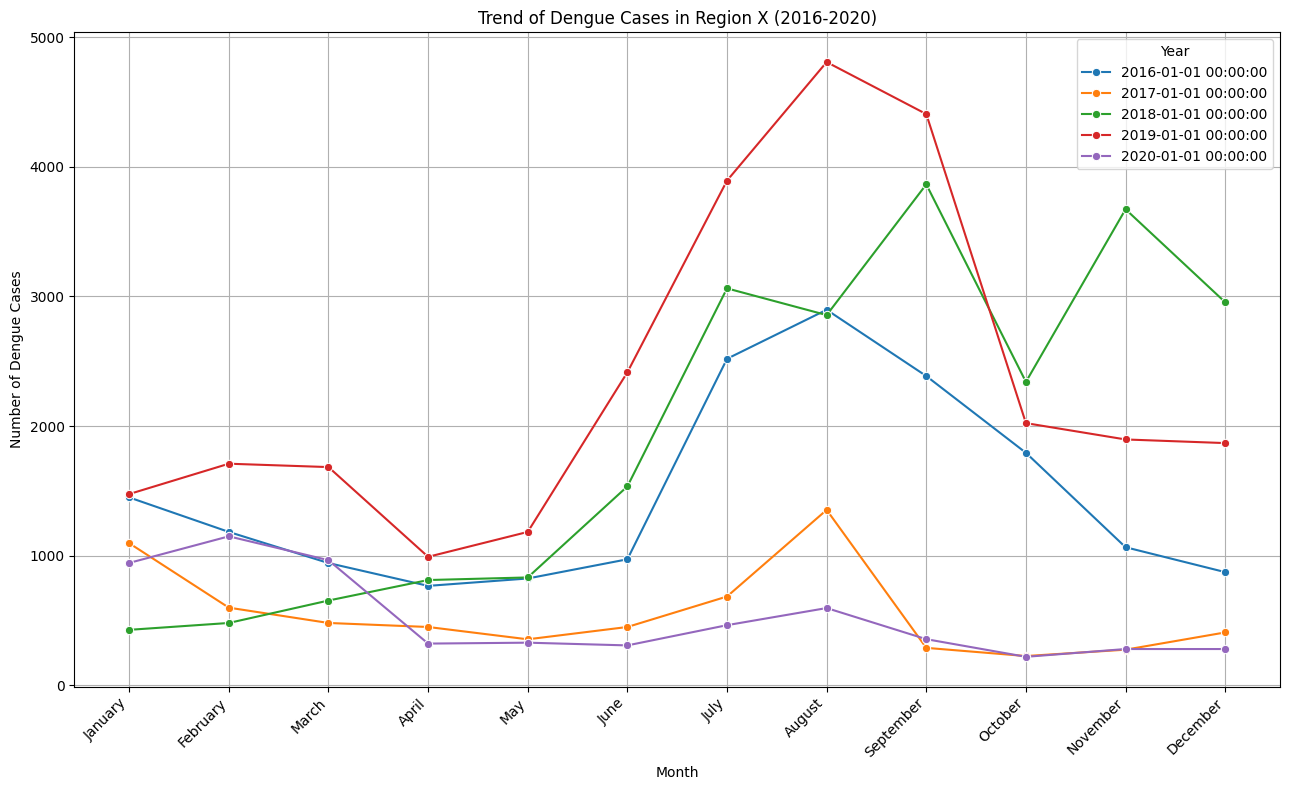

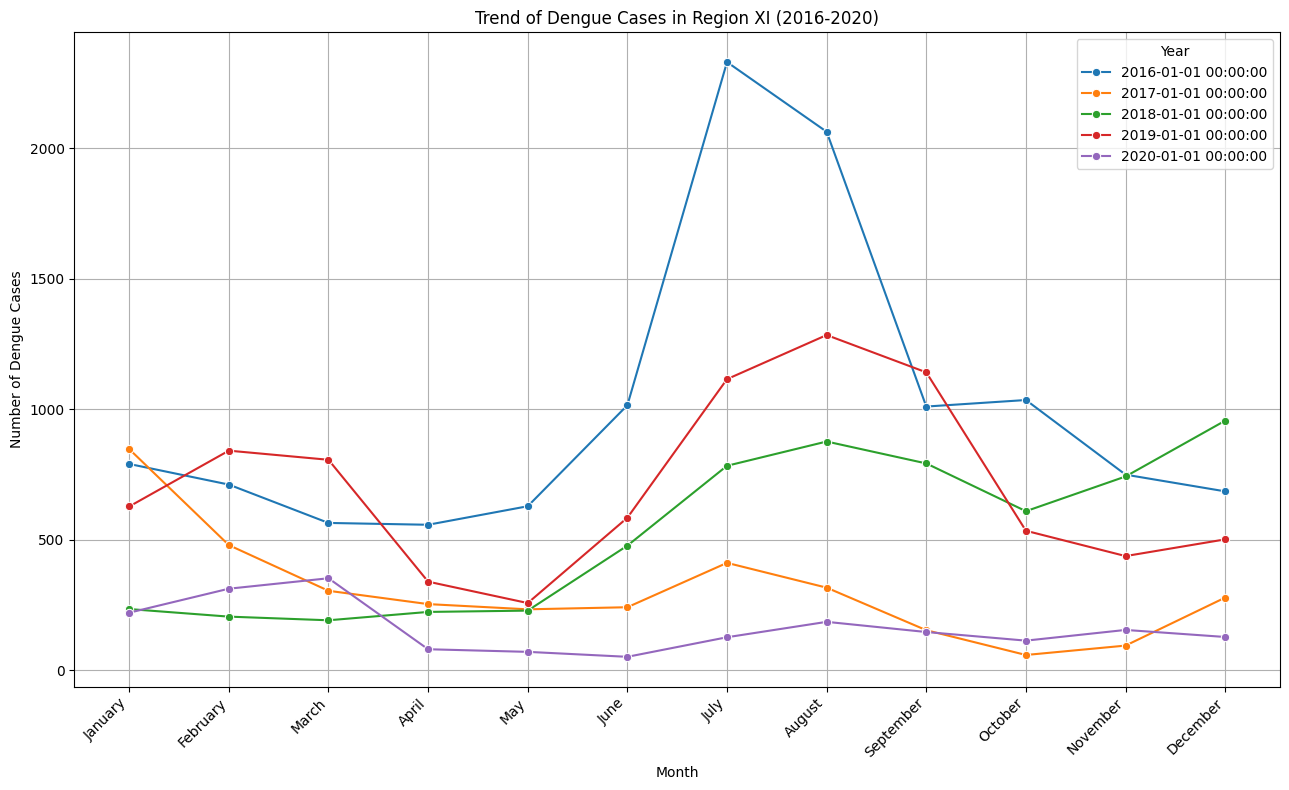

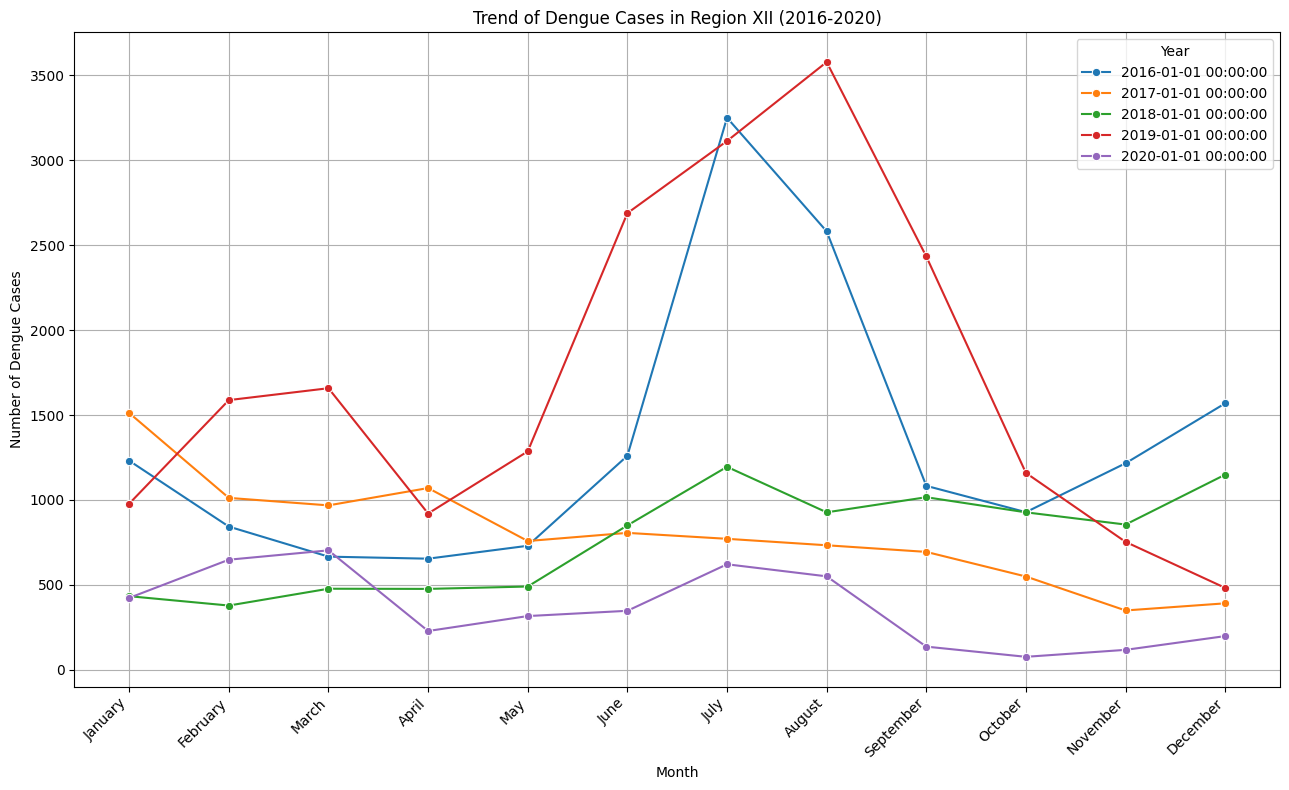

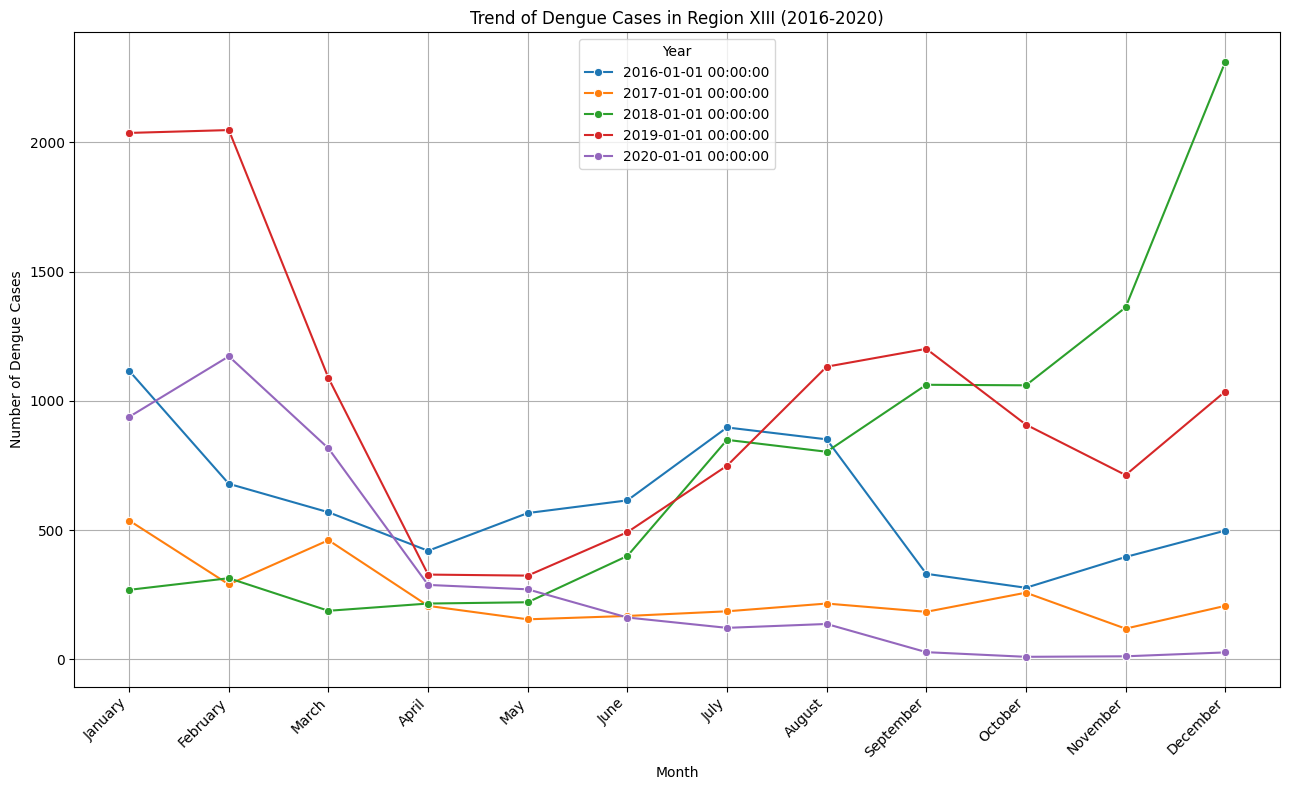

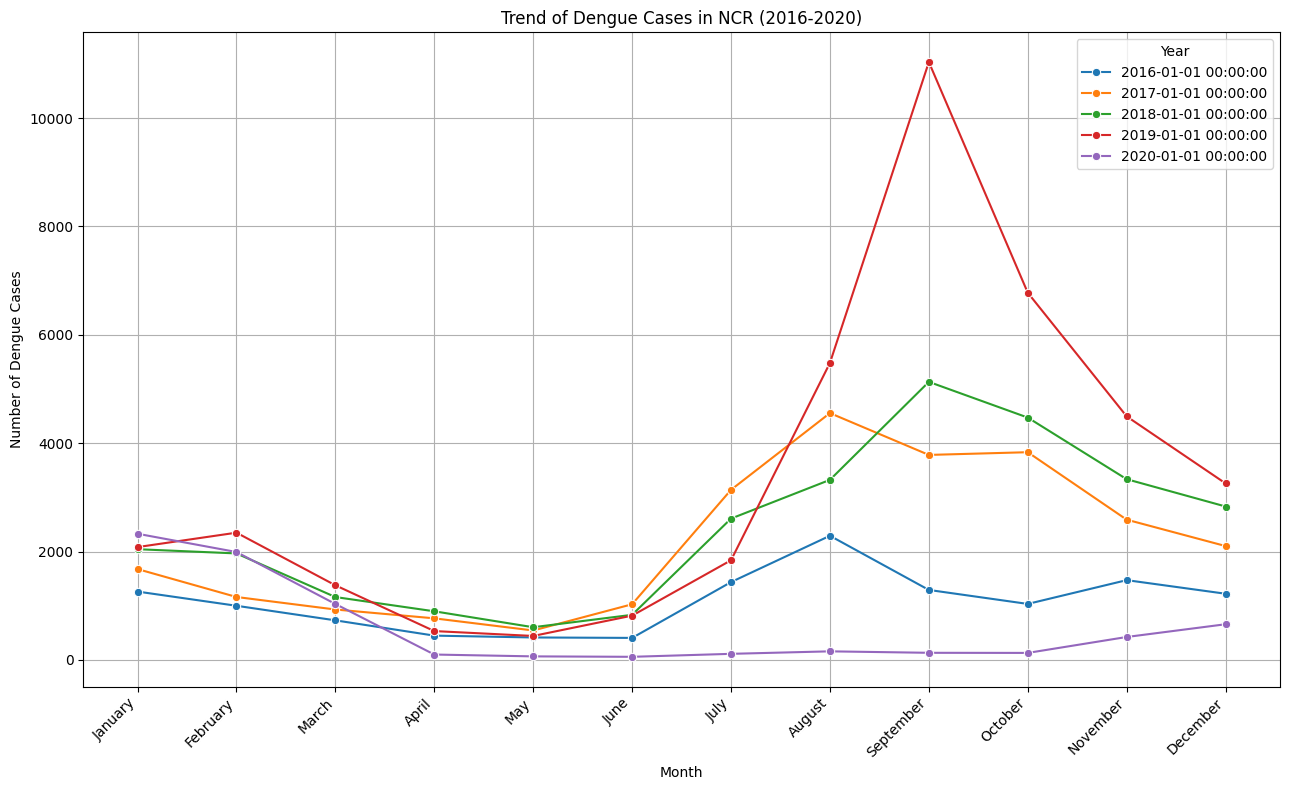

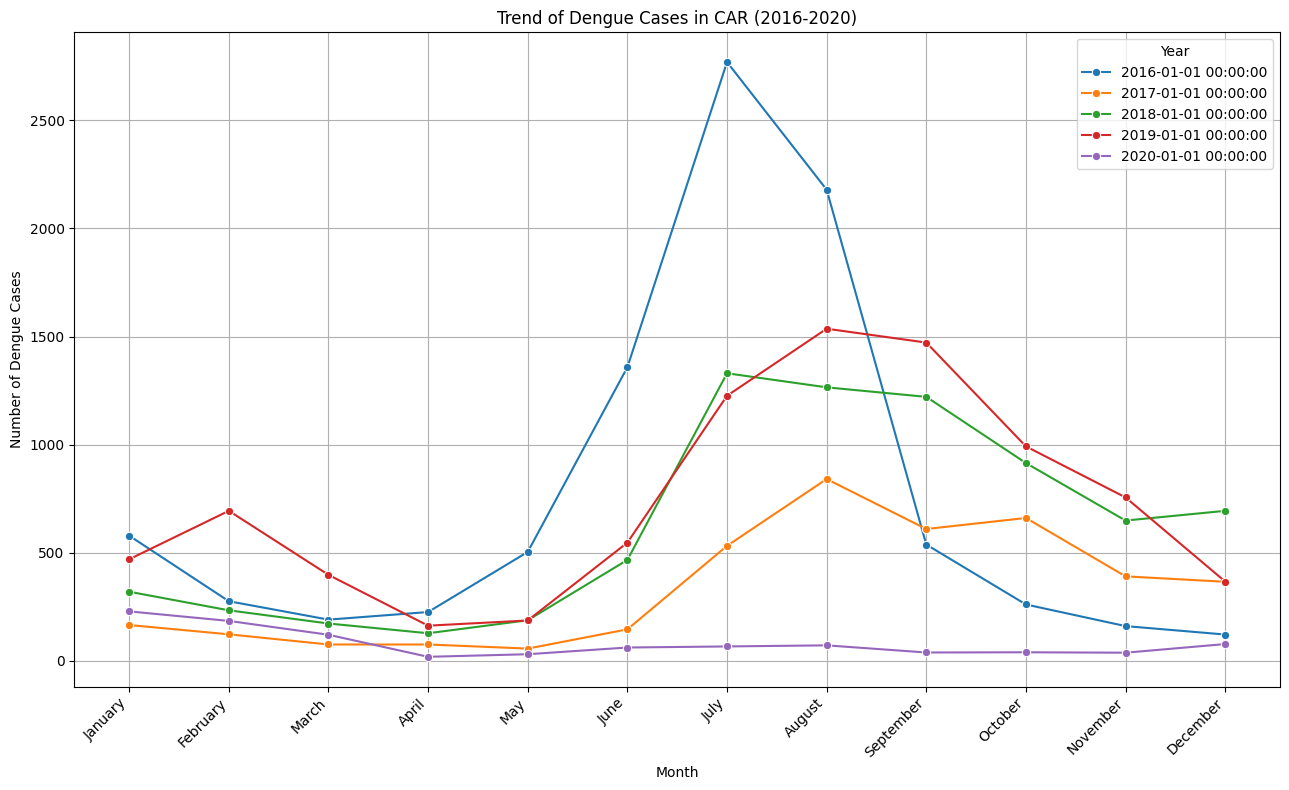

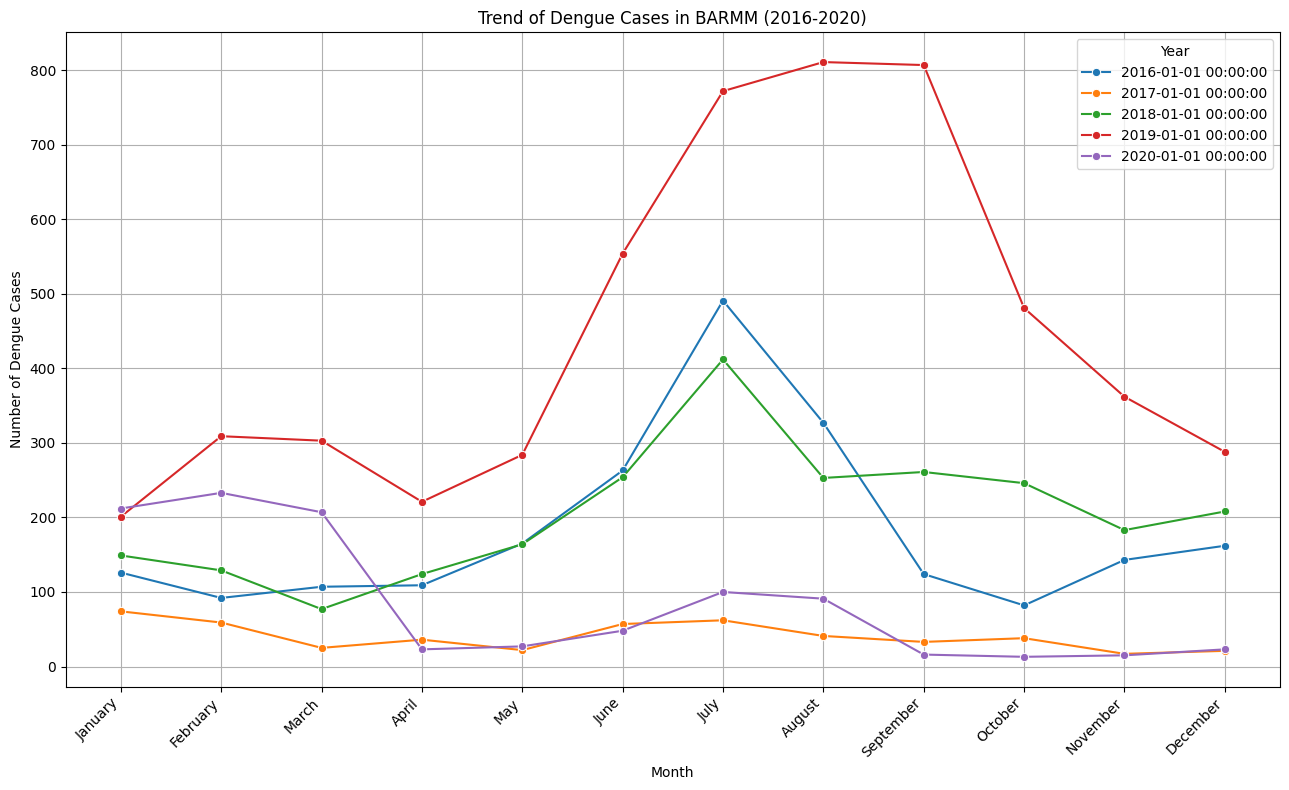

In [70]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 
               'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

# Loop through each region and create a line plot
for region in dengue['Region'].unique():
    region_data = dengue[dengue['Region'] == region]
    
    # Create the line plot
    plt.figure(figsize=(13,8))
    sns.lineplot(data=region_data, x='Month', y='Dengue_Cases', hue='Year', marker='o')
    plt.title(f'Trend of Dengue Cases in {region} (2016-2020)')
    plt.xlabel('Month')
    plt.ylabel('Number of Dengue Cases')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Year')
    plt.grid(True)
    plt.tight_layout()
    plt.show()